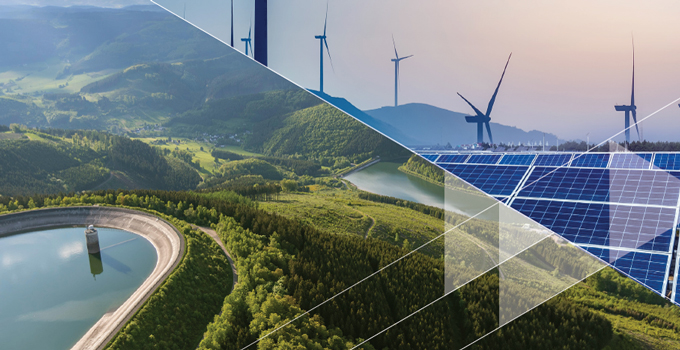

# Global Power Plant Database Project


# Problem Statement:


Description:-
The Global Power Plant Database is a comprehensive, open source database of power plants around the
world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s
own analysis. The database covers approximately 35,000 power plants from 167 countries and includes
thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind,
solar). Each power plant is geolocated and entries contain information on plant capacity, generation,
ownership, and fuel type. It will be continuously updated as data becomes available.

Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw


# Breakdown of the Problem Statement:
    .Supervised machine learning problem.
    .Classcification problem 
    .Linear Regression problems 
    .The target value will be  Primary Fuel ,capacity_mw 


# Aim of The project:
    The objective is to create a model that can predict Primary Fuel ,capacity_mw  based on its features.



In [149]:
import pandas as pd
df=pd.read_csv('database_IND.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
903       1600.0   16.2949    77.3568         Coal         Oil         NaN   
904          3.0   12.8932    78.1654        Solar         NaN         NaN   
905         25.5   15.2758    75.5811         Wind         NaN         NaN   
906         80.0   24.3500    73.7477         Coal         NaN         NaN   
907         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...                    geolocation_source  wepp_id year_of_capacity_data  \
0    ...  National Renewable Energy Laboratory      NaN                   NaN   
1    ...                                   WRI      NaN                   NaN   
2    ...                                   WRI      NaN                   NaN   
3    ...                                   WRI      NaN                2018.0   
4    ...                                   WRI      NaN                2018.0   
..   ...                                   ...      ...                   ...   
903  ...                                   WRI      NaN                2018.0   
904  ...                        Industry About      NaN                   NaN   
905  ...                                   WRI      NaN                   NaN   
906  ...                                   WRI      NaN                   NaN   
907  ...                                   WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            631.777928          617.789264          843.747000   
4           1668.290000         3035.550000         5916.370000   
..                  ...                 ...                 ...   
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             886.004428           663.774500  Central Electricity Authority   
4            6243.000000          5385.579736  C

In [150]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# About columns

country (text):
    3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
country_long (text): 
    longer form of the country designation
    
name (text): 
    name or title of the power plant, generally in Romanized form
    
gppd_idnr (text): 
    10 or 12 character identifier for the power plant
    
capacity_mw (number): 
    electrical generating capacity in megawatts
    
latitude (number): 
    geolocation in decimal degrees; WGS84 (EPSG:4326)
    
longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
primary_fuel (text): energy source used in primary electricity generation or export
    
other_fuel1(text): energy source used in electricity generation or export
    
other_fuel2 (text): energy source used in electricity generation or export
    
other_fuel3 (text): energy source used in electricity generation or export
    
commissioning_year (number): 
    year of plant operation, weighted by unit-capacity when data is available
    
owner (text): majority shareholder of the power plant, generally in Romanized form
    
source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
url (text): 
    web document corresponding to the `source` field
    
geolocation_source (text): attribution for geolocation information
     
wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
year_of_capacity_data (number): year the capacity information was reported
    
generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
    
generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
    
generation_gwh_2015 (number): 
    electricity generation in gigawatt-hours reported for the year 2015
    
generation_gwh_2016 (number): 
    electricity generation in gigawatt-hours reported for the year 2016
    
generation_gwh_2017 (number): 
    electricity generation in gigawatt-hours reported for the year 2017
    
generation_gwh_2018 (number): 
    electricity generation in gigawatt-hours reported for the year 2018
    
generation_gwh_2019 (number): 
    electricity generation in gigawatt-hours reported for the year 2019
    
generation_data_source (text): 
    attribution for the reported generation information
    
estimated_generation_gwh_2013 (number): 
    estimated electricity generation in gigawatt-hours for the year 2013
    
estimated_generation_gwh_2014 (number):
    estimated electricity generation in gigawatt-hours for the year 2014 
    
estimated_generation_gwh_2015 (number): 
    estimated electricity generation in gigawatt-hours for the year 2015 
    
estimated_generation_gwh_2016 (number): 
    estimated electricity generation in gigawatt-hours for the year 2016 
    
estimated_generation_gwh_2017 (number): 
    estimated electricity generation in gigawatt-hours for the year 2017 
    
estimated_generation_note_2013 (text): 
    label of the model/method used to estimate generation for the year 2013
    
estimated_generation_note_2014 (text): 
    label of the model/method used to estimate generation for the year 2014 
    
estimated_generation_note_2015 (text): 
    label of the model/method used to estimate generation for the year 2015
    
estimated_generation_note_2016 (text): 
    label of the model/method used to estimate generation for the year 2016
    
estimated_generation_note_2017 (text): 
    label of the model/method used to estimate generation for the year 2017 

# Exploratory data analysis:
    Exploratory Data Analysis or EDA is very crucial for the success of all data science projects. It is an approach to analyze and understand the various aspects of the data.




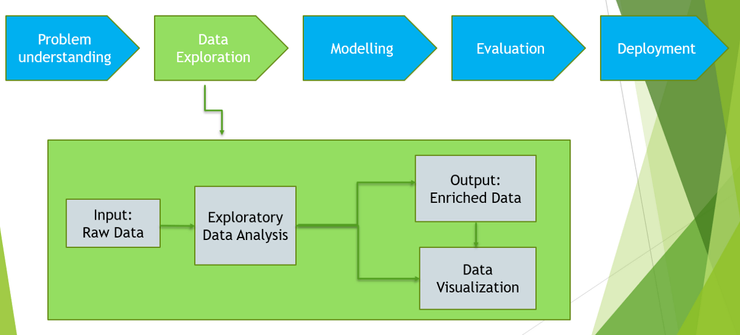

In [151]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

it shows the top five rows data in the dataset

In [152]:
df.tail()

country country_long                          name   gppd_idnr  \
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
903       1600.0   16.2949    77.3568         Coal         Oil         NaN   
904          3.0   12.8932    78.1654        Solar         NaN         NaN   
905         25.5   15.2758    75.5811         Wind         NaN         NaN   
906         80.0   24.3500    73.7477         Coal         NaN         NaN   
907         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  geolocation_source  wepp_id year_of_capacity_data  \
903  ...                 WRI      NaN                2018.0   
904  ...      Industry About      NaN                   NaN   
905  ...                 WRI      NaN                   NaN   
906  ...                 WRI      NaN                   NaN   
907  ...                 WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016  generation_gwh_2017         generation_data_source  \
903            233.59665                865.4  Central Electricity Authority   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   
907                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  
907                       NaN  

[5 rows x 25 columns]

 it shows the below five rows data in the dataset

In [153]:
df.sample(5)

country country_long                                 name   gppd_idnr  \
502     IND        India  Mandrup - Giriraj Solar Power Plant  WRI1026170   
888     IND        India             Vastan Solar Power Plant  WRI1026219   
4       IND        India                         AKALTARA TPP  IND0000002   
271     IND        India              Horti Solar Power Plant  WRI1026146   
126     IND        India                    Belgaum Wind farm  WRI1026074   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
502          6.6   17.4999    75.7810        Solar         NaN         NaN   
888          5.0   21.4239    73.1273        Solar         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
271         20.0   17.9054    76.3224        Solar         NaN         NaN   
126         50.4   15.9349    74.7007         Wind         NaN         NaN   

     ...  geolocation_source  wepp_id year_of_capacity_data  \
502  ...      Industry About      NaN                   NaN   
888  ...      Industry About      NaN                   NaN   
4    ...                 WRI      NaN                2018.0   
271  ...      Industry About      NaN                   NaN   
126  ...                 WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
502                 NaN                 NaN                 NaN   
888                 NaN                 NaN                 NaN   
4               1668.29             3035.55             5916.37   
271                 NaN                 NaN                 NaN   
126                 NaN                 NaN                 NaN   

     generation_gwh_2016  generation_gwh_2017         generation_data_source  \
502                  NaN                  NaN                            NaN   
888                  NaN                  NaN                            NaN   
4                 6243.0          5385.579736  Central Electricity Authority   
271                  NaN                  NaN                            NaN   
126                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
502                       NaN  
888                       NaN  
4                         NaN  
271                       NaN  
126                       NaN  

[5 rows x 25 columns]

it shows the any of the sample rows data in the dataset

In [154]:
df.shape

(908, 25)

it shows the how many number of rows and columns in the dataset

In [155]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

it shows the all columns name in the dataset

In [156]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

it will give the dtypes of data ie float int and object with columns name

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

It will shows the basic information about the data like how many columns and rows in the data and null value count
and dtype float or object or int

In [158]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

here showing that null value is present in this dataset

In [159]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

it shows the unique value no duplicate 

<AxesSubplot:>

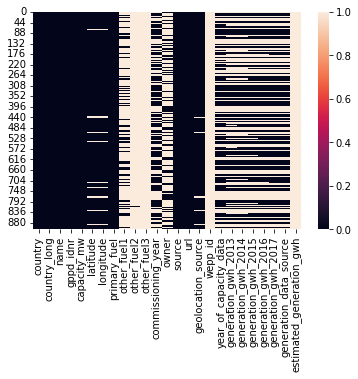

In [160]:
import seaborn as sns
sns.heatmap(df.isnull())

here showing that value is missing in this datasets

In [161]:
import numpy as np

In [162]:
#frist step to find out the  which columns has null value is presented 
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0] 
#step2 to print the columns name and the percentage of missing values
for features in features_with_na:
    print(features,np.round(df[features].isnull().mean(),4),  '% missing values' )

latitude 0.0507 % missing values
longitude 0.0507 % missing values
other_fuel1 0.7808 % missing values
other_fuel2 0.9989 % missing values
other_fuel3 1.0 % missing values
commissioning_year 0.4185 % missing values
owner 0.6233 % missing values
geolocation_source 0.0209 % missing values
wepp_id 1.0 % missing values
year_of_capacity_data 0.4273 % missing values
generation_gwh_2013 0.5771 % missing values
generation_gwh_2014 0.5584 % missing values
generation_gwh_2015 0.5319 % missing values
generation_gwh_2016 0.5187 % missing values
generation_gwh_2017 0.5121 % missing values
generation_data_source 0.5044 % missing values
estimated_generation_gwh 1.0 % missing values


In [163]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [164]:
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [165]:
df['other_fuel3'].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [166]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [167]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [168]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [169]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

this columns having a lot of null value is grether than 80% null values is presentd in this columns thats why this columns is deleted

In [170]:
df["owner"]=df["owner"].fillna(df["owner"].mode()[0])
df["geolocation_source"]=df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["generation_data_source"]=df["generation_data_source"].fillna(df["generation_data_source"].mode()[0])

In [171]:
df["latitude"]=df["latitude"].fillna(df["latitude"].mean())
df["longitude"]=df["longitude"].fillna(df["longitude"].mean())
df["commissioning_year"]=df["commissioning_year"].fillna(df["commissioning_year"].mean())
df["year_of_capacity_data"]=df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].mean())
df["generation_gwh_2013"]=df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].mean())
df["generation_gwh_2014"]=df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean())
df["generation_gwh_2015"]=df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean())
df["generation_gwh_2016"]=df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean())
df["generation_gwh_2017"]=df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean())


In [172]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

here showing that non of the columns has missing value is remaining

<AxesSubplot:>

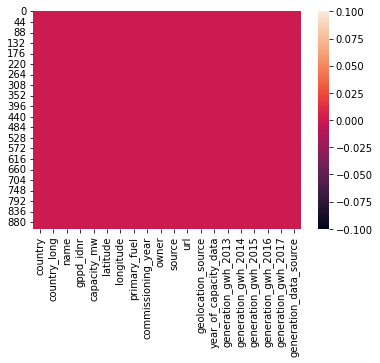

In [173]:
sns.heatmap(df.isnull())

here showing that non of the columns has missing value is remaining

In [174]:
df.shape

(908, 20)

In [175]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   908.000000  908.000000  908.000000          908.000000   
mean    321.046378   21.196189   77.447848         1996.876894   
std     580.221767    6.088110    4.781201           12.994825   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.837500   17.057825   74.390250         1996.876894   
50%      60.000000   21.278850   76.978950         1996.876894   
75%     388.125000   25.183775   79.211600         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count                  908.0           908.000000           908.000000   
mean                  2018.0          2304.059202          2420.393316   
std                      0.0          2465.930970          2665.360236   
min                   2018.0             0.000000             0.000000   
25%                   2018.0          1332.538825          1175.264825   
50%                   2018.0          2304.059202          2420.393316   
75%                   2018.0          2304.059202          2420.393316   
max                   2018.0         27586.200000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  
count           908.000000           908.000000           908.000000  
mean           2414.072373          2453.936292          2531.754458  
std            2860.146282          2878.730064          2923.041411  
min               0.000000             0.000000             0.000000  
25%             874.205000           826.629750           852.438887  
50%            2414.072373          2453.936292          2531.754458  
75%            2414.072373          2453.936292          2531.754458  
max           30539.000000         30015.000000         35116.000000

describe():- The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.


# key observations:
    std is high in columns are capacity_mw,generation_gwh_2013,	generation_gwh_2014,generation_gwh_2015,generation_gwh_2016	,generation_gwh_2017 grether than 3std it means data is spread out and possibility is having outlier is present.
    mean is grether than median in a columns are capacity_mw,latitude it means right skewed data in those columns.
    there is a difference between min value and 25th percentile in a columns are capacity_mw,latitude,longitude,generation_gwh_2013	generation_gwh_2014	generation_gwh_2015	generation_gwh_2016	generation_gwh_2017	 possibility is having a outliers are present in a columns 
    also range of difference between 75th percentile and max value it means possibilities is having a outliers are present

capacity_mw                 AxesSubplot(0.125,0.657941;0.168478x0.222059)
latitude                 AxesSubplot(0.327174,0.657941;0.168478x0.222059)
longitude                AxesSubplot(0.529348,0.657941;0.168478x0.222059)
commissioning_year       AxesSubplot(0.731522,0.657941;0.168478x0.222059)
year_of_capacity_data       AxesSubplot(0.125,0.391471;0.168478x0.222059)
generation_gwh_2013      AxesSubplot(0.327174,0.391471;0.168478x0.222059)
generation_gwh_2014      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
generation_gwh_2015      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
generation_gwh_2016            AxesSubplot(0.125,0.125;0.168478x0.222059)
generation_gwh_2017         AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

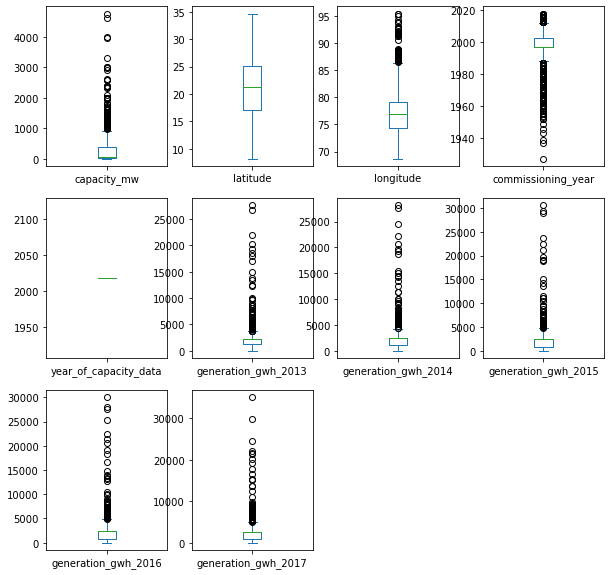

In [176]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


Observations:
    here showing that in columns are capacity_mw,Longitude,Commissioning_year, generation_gwh_2013, generation_gwh_2014,generation_gwh_2015,generation_gwh_2016    ,generation_gwh_2017
    in this columns are outliers are presented 
    

In [177]:
# this fratures is not important to modeling and visualization  this cam give only indication and this all features has unique one
df.drop(['name','gppd_idnr','owner','source','url'],axis=1,inplace=True)

In [178]:
#separate the categorical feature from datasets for analysis 
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("number of categorical features:", len(categorical_features))

number of categorical features: 5


In [179]:
categorical_features

['country',
 'country_long',
 'primary_fuel',
 'geolocation_source',
 'generation_data_source']

In [180]:
df[categorical_features].head()

country country_long primary_fuel                    geolocation_source  \
0     IND        India        Solar  National Renewable Energy Laboratory   
1     IND        India         Coal                                   WRI   
2     IND        India         Wind                                   WRI   
3     IND        India          Gas                                   WRI   
4     IND        India         Coal                                   WRI   

          generation_data_source  
0  Central Electricity Authority  
1  Central Electricity Authority  
2  Central Electricity Authority  
3  Central Electricity Authority  
4  Central Electricity Authority

In [181]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [182]:
#lets analysis the categorical features with the help of countplot,countplot is count the values of each categories is presented
#in the each columns it will shows the value counts of each category is presented in the columns it will shows the frequency
#here i created function of categorical features to plot the countplot
def plot_categorical(categorical_features):
    plt.subplots(figsize=(20,6))
    sns.countplot(categorical_features,data=df,dodge=True,palette='ocean',hue='primary_fuel')
    plt.xticks(rotation=80)
    plt.xlabel(categorical_features)
    plt.ylabel('Frequency')
    plt.title(categorical_features)
    plt.show()
    

In [183]:
c=df['country'].value_counts()
c/c.sum()

IND    1.0
Name: country, dtype: float64

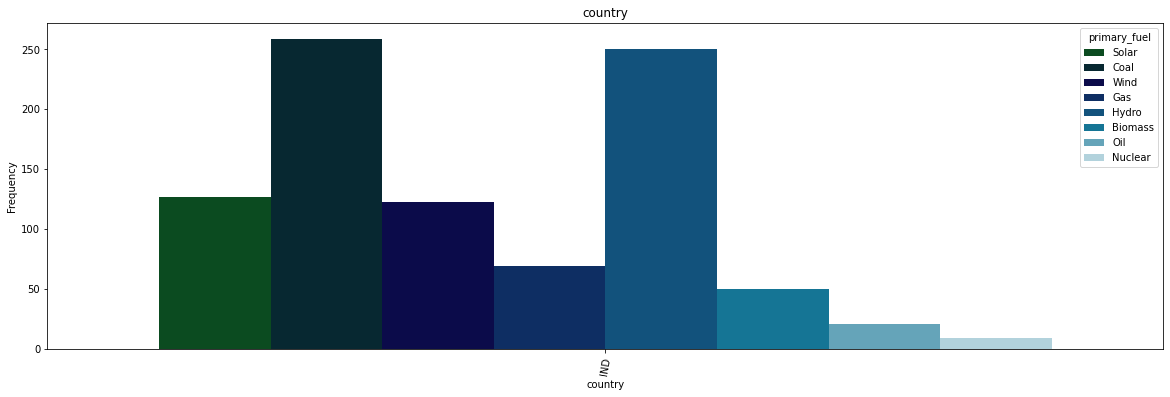

In [184]:
plot_categorical('country')

# observation:
    1. Here showing that in a country india primary fuel coal and hydro majority is higher as compared to the other primary fuel
    2. This power palnt can generate the more energy  as compared to the other power palnt

In [185]:
c=df['country_long'].value_counts()
c/c.sum()

India    1.0
Name: country_long, dtype: float64

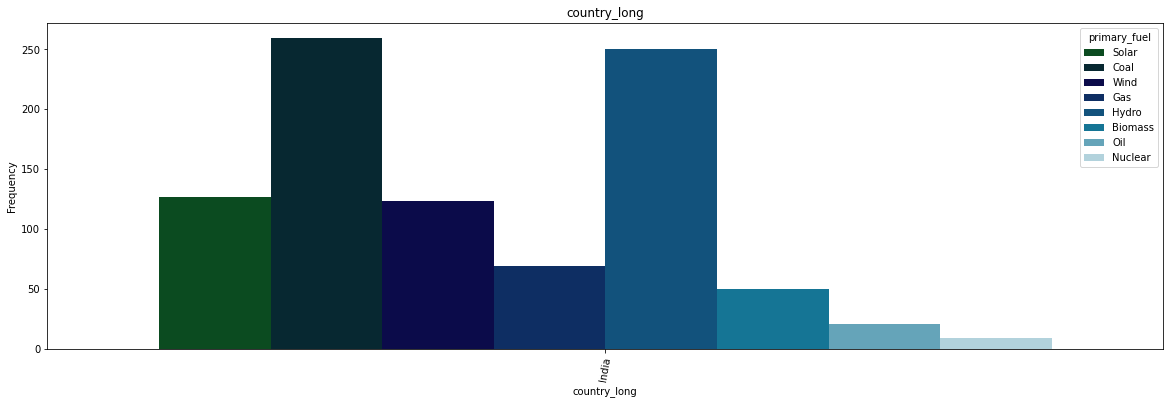

In [186]:
plot_categorical('country_long')

# observations:
    1. Here showing that in a country_long india primary fuel coal and hydro has majority is higher  
    2 .This power plant generated more energy  as compared to other power palnt
    

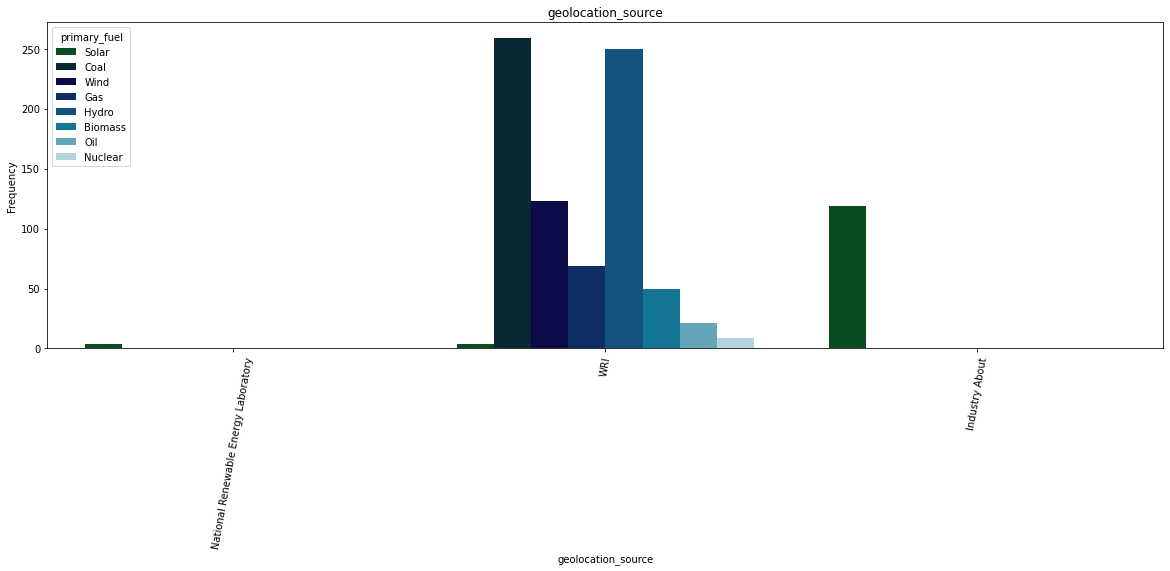

In [187]:
plot_categorical('geolocation_source')

# observation:
    1.Here showing that coal and hydro power palnt has generated more energy comparing to other power plant 
    2. This power palnt is supplying's the more energy to the different sources 

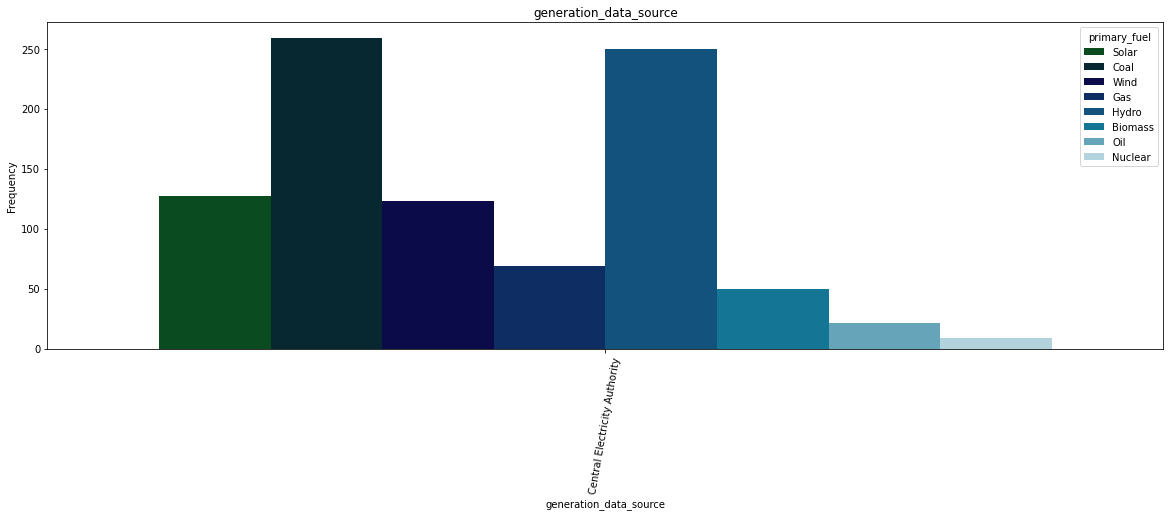

In [188]:
plot_categorical('generation_data_source')

# observation:
    1.Here showing that coal and hydro power palnt has generated more energy comparing to other power plant 
    2. This power palnt is supplying's the more energy to the central electricity Authority
    

In [189]:
#separate the list of numerical variables and print out the numerical features
numerical_features =[feature for feature in df.columns if df[feature].dtypes != 'object' ]
print("number of numerical variables: " , len(numerical_features))

number of numerical variables:  10


In [190]:
numerical_features

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [191]:
#head of numerical features
df[numerical_features].head()

capacity_mw  latitude  longitude  commissioning_year  \
0          2.5   28.1839    73.2407         2011.000000   
1         98.0   24.7663    74.6090         1996.876894   
2         39.2   21.9038    69.3732         1996.876894   
3        135.0   23.8712    91.3602         2004.000000   
4       1800.0   21.9603    82.4091         2015.000000   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                 2018.0          2304.059202          2420.393316   
1                 2018.0          2304.059202          2420.393316   
2                 2018.0          2304.059202          2420.393316   
3                 2018.0           631.777928           617.789264   
4                 2018.0          1668.290000          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  
0          2414.072373          2453.936292          2531.754458  
1          2414.072373          2453.936292          2531.754458  
2          2414.072373          2453.936292          2531.754458  
3           843.747000           886.004428           663.774500  
4          5916.370000          6243.000000          5385.579736

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

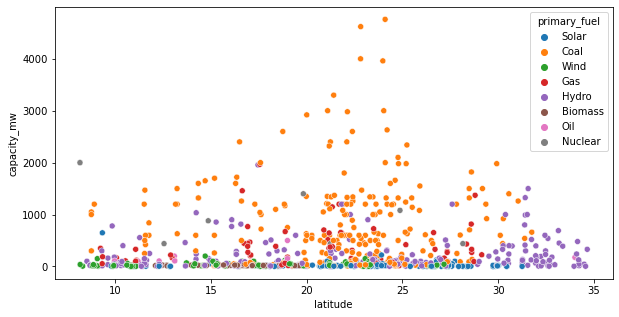

In [192]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='latitude', y='capacity_mw',hue='primary_fuel',data=df)

# Observations:
    Here showing that as compared to  capacity_mw of power plant coal and hydro power plant has higher capacity ,
    latitude is high is hydropower plant

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

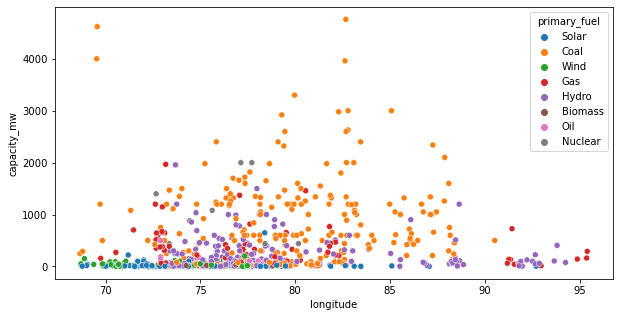

In [193]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='longitude', y='capacity_mw',hue='primary_fuel',data=df)

# Observations:
    Here showing that as compared to  capacity_mw of power plant coal and hydro power plant has higher capacity , this power plant generated the more energy 
    longitude  is high is hydropower plant

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

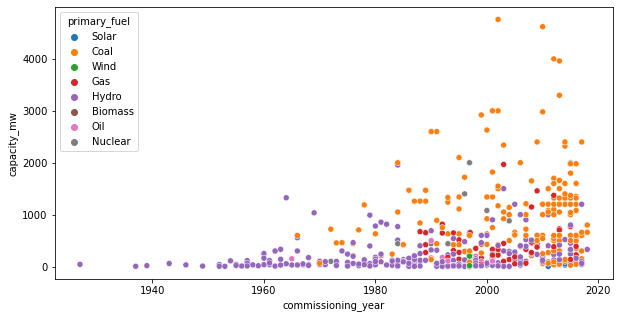

In [194]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='commissioning_year', y='capacity_mw',hue='primary_fuel',data=df)

# Observations:
    Here showing that as compared to  capacity_mw of power plant coal and hydro power plant has higher capacity , this power plant generated the more energy 
    commissioning_year  in 2000 to 2020 capacity  of coal power pant is increasing  it can supplying the more energy 

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='capacity_mw'>

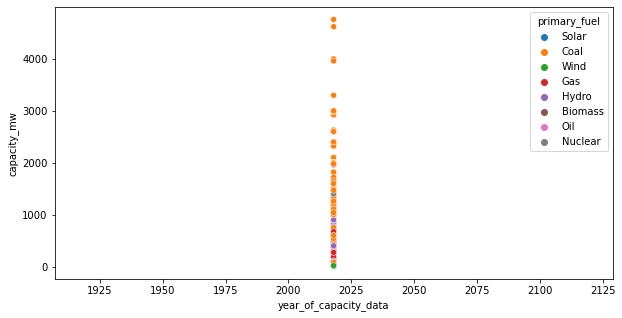

In [195]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='year_of_capacity_data', y='capacity_mw',hue='primary_fuel',data=df)

# observations:
    Here showing that capacity is incresing of coal power plant as comparing to the years_of_capacity_data,other power plant can generate the less energy
    

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

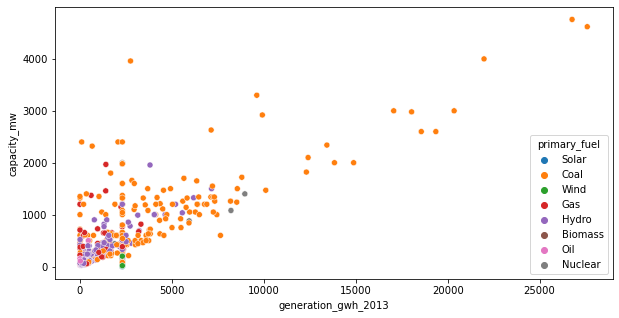

In [196]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2013', y='capacity_mw',hue='primary_fuel',data=df)

# observations:
    Estimated electricity generation in gigawatt-hours for the year 2013 has coal power plant capacity is increasing  as comparing to the other power plant also showing a positive relationship between this two columns

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

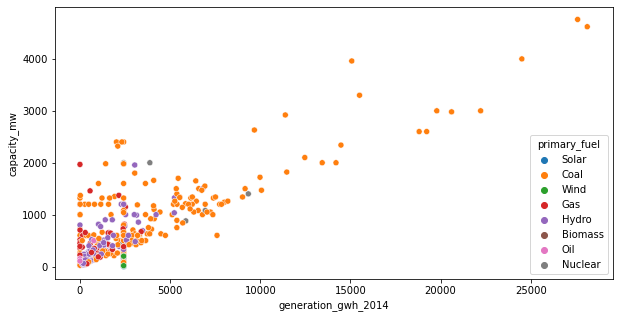

In [197]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2014', y='capacity_mw',hue='primary_fuel',data=df)

# observations:
    Estimated electricity generation in gigawatt-hours for the year 2014 has coal power plant capacity is increasing  as comparing to the other power plant also showing a positive relationship between this two columns

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

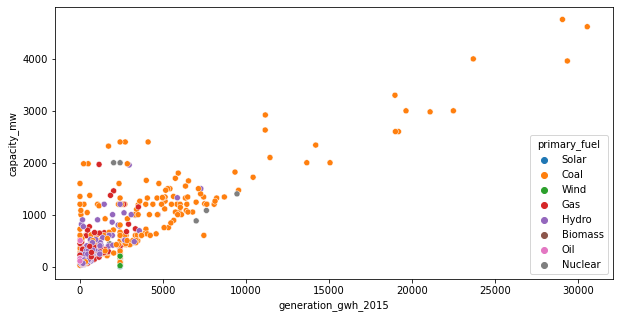

In [198]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2015', y='capacity_mw',hue='primary_fuel',data=df)

# observations:
    Estimated electricity generation in gigawatt-hours for the year 2015 has coal power plant capacity is increasing  as comparing to the other power plant also showing a positive relationship between this two columns,data is moving upword

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

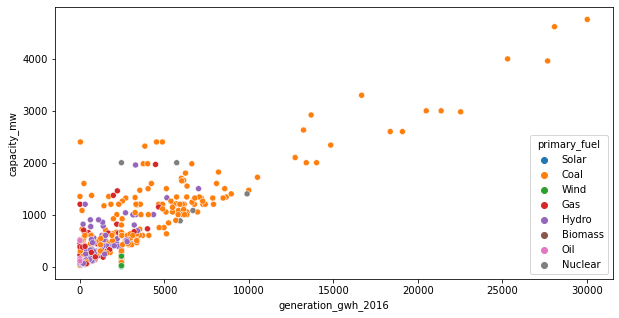

In [199]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',hue='primary_fuel',data=df)

# observations:
    Estimated electricity generation in gigawatt-hours for the year 2016 has coal power plant capacity is increasing  as comparing to the other power plant also showing a positive relationship between this two columns,data is moving upword

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

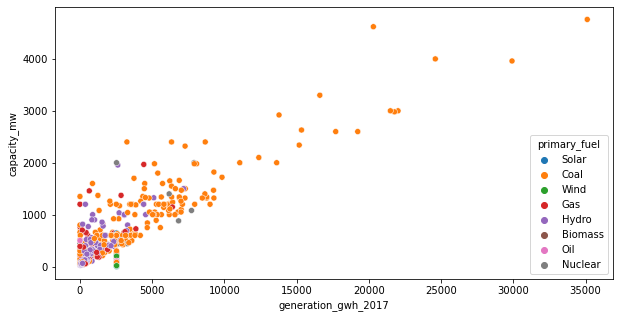

In [200]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',hue='primary_fuel',data=df)

# observations:
    Estimated electricity generation in gigawatt-hours for the year 2017 has coal power plant capacity is increasing  as comparing to the other power plant also showing a positive relationship between this two columns,data is moving upword

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

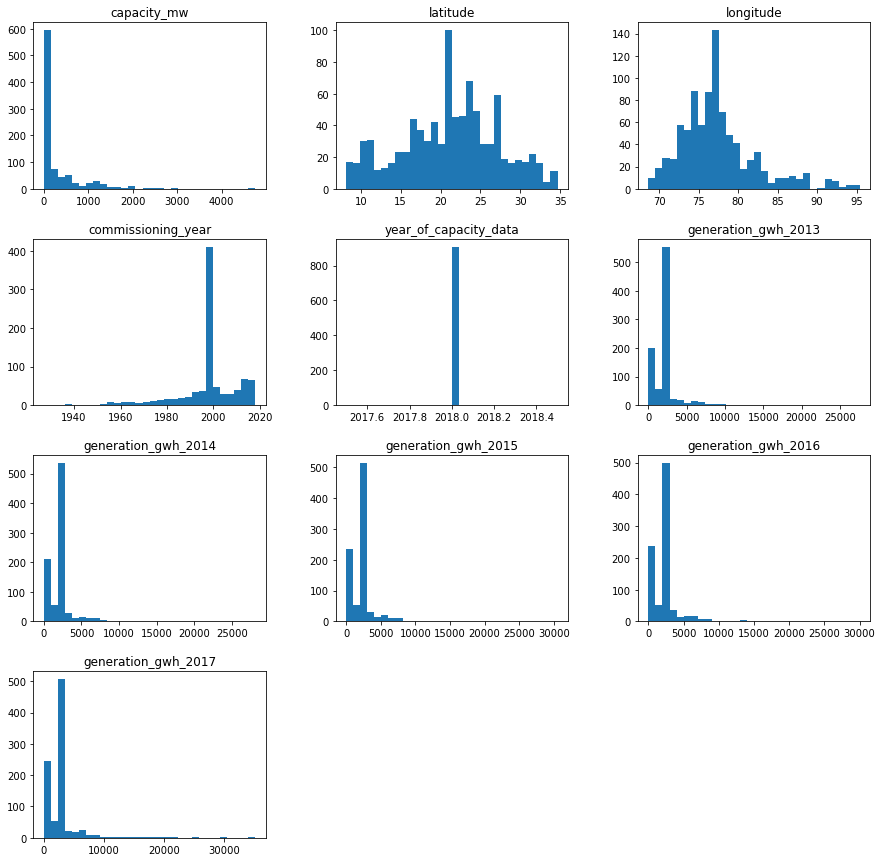

In [201]:
df.hist(figsize=(15,15), grid=False, layout=(4,3), bins = 30)


# Observations:
    1.Here showing that capacity_mw,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
    2.This columns having a right tail skewness ,data in this columns having a more weight in a right side,and mean is grether than median of this columns
    3.lattitude, commissioning_year,years_of_capacity_data this columns has left skewed data is presented 
    4. weight ot this columns has left side is more and mean is less than median ot this columns

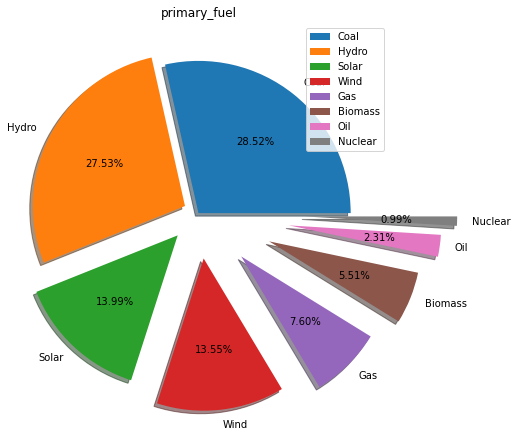

In [202]:
label=df['primary_fuel'].value_counts().index
data=df['primary_fuel'].value_counts().values
fig=plt.figure(figsize=(10,7))
plt.pie(data,labels =label,autopct="%.2f%%",shadow=True,explode=(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7))
plt.title('primary_fuel')
plt.legend()
plt.show()

# Observations:
    Here showing that contributions of coal and hydro primary fuel has percentage is high as comapred to the other primary fuel
    this fuel can generate the more energy and supply for more energy to the power station 

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

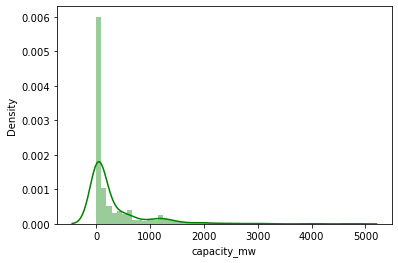

In [203]:
sns.distplot(df['capacity_mw'],color='Green')

The Data in the columns is not normalized .The building blocks is out of the normalised curve, this columns having a right skewness' 

In [204]:
print('Skewness: %f' % df['capacity_mw'].skew())
print('Kurtsis: %f' %df['capacity_mw'].kurt())

Skewness: 3.193257
Kurtsis: 13.743727


<AxesSubplot:xlabel='latitude', ylabel='Density'>

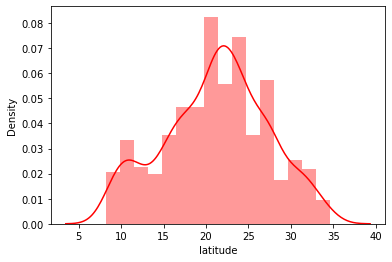

In [205]:
sns.distplot(df['latitude'],color= "r")

The Data in the columns is not normalized .The building blocks is out of the normalised curve, this columns having a left skewness' 

In [206]:
print('Skewness: %f' % df['latitude'].skew())
print('Kurtsis: %f' %df['latitude'].kurt())

Skewness: -0.147391
Kurtsis: -0.528463


<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

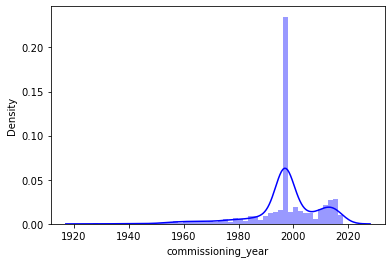

In [207]:
sns.distplot(df['commissioning_year'],color= "b")

The Data in the columns is not normalized .The building blocks is out of the normalised curve,this columns having a left skewness

In [208]:
print('Skewness: %f' % df['commissioning_year'].skew())
print('Kurtsis: %f' %df['commissioning_year'].kurt())

Skewness: -1.383330
Kurtsis: 3.477418


<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

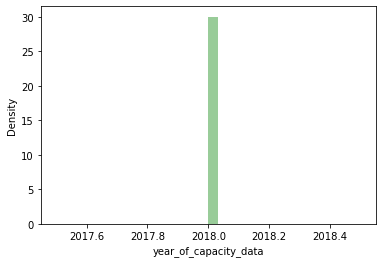

In [209]:
sns.distplot(df['year_of_capacity_data'],color='g')

The Data in the columns is  normalized .The building blocks is not out of the normalised curve

In [210]:
print('Skewness: %f' % df['year_of_capacity_data'].skew())
print('Kurtsis: %f' %df['year_of_capacity_data'].kurt())

Skewness: 0.000000
Kurtsis: 0.000000


<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

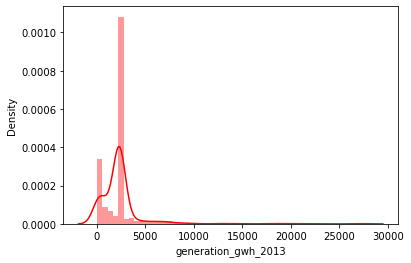

In [211]:
sns.distplot(df[ 'generation_gwh_2013'],color='r')

The Data in the columns is not  normalized .The building blocks is  out of the normalised curve,this columns having a right skewness

In [212]:
print('Skewness: %f' % df['generation_gwh_2013'].skew())
print('Kurtsis: %f' %df['generation_gwh_2013'].kurt())

Skewness: 5.241491
Kurtsis: 38.921198


<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

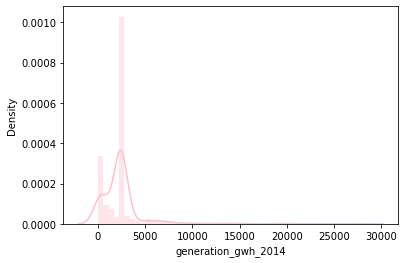

In [213]:
sns.distplot(df[ 'generation_gwh_2014'],color='pink')

The Data in the columns is not  normalized .The building blocks is  out of the normalised curve,this columns having a right skewness

In [214]:
print('Skewness: %f' % df['generation_gwh_2014'].skew())
print('Kurtsis: %f' %df['generation_gwh_2014'].kurt())

Skewness: 5.041961
Kurtsis: 35.447283


<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

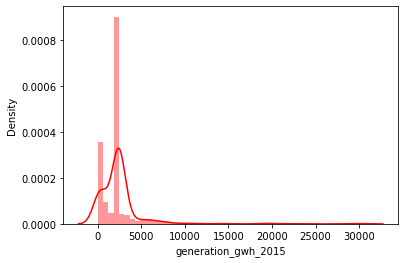

In [215]:
sns.distplot(df[ 'generation_gwh_2015'],color='r')

The Data in the columns is not  normalized .The building blocks is  out of the normalised curve,this columns having a right skewness

In [216]:
print('Skewness: %f' % df['generation_gwh_2015'].skew())
print('Kurtsis: %f' %df['generation_gwh_2015'].kurt())

Skewness: 5.367370
Kurtsis: 39.646565


<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

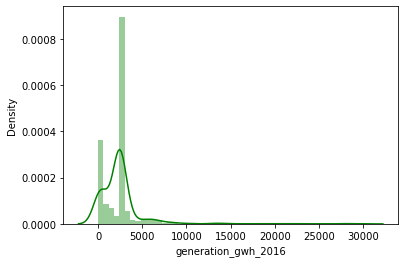

In [217]:
sns.distplot(df[ 'generation_gwh_2016'],color='g')

The Data in the columns is not  normalized .The building blocks is  out of the normalised curve,this columns having a right skewness

In [218]:
print('Skewness: %f' % df['generation_gwh_2016'].skew())
print('Kurtsis: %f' %df['generation_gwh_2016'].kurt())

Skewness: 5.071758
Kurtsis: 35.696554


<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

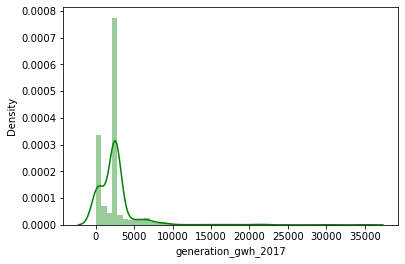

In [219]:
sns.distplot(df[ 'generation_gwh_2017'],color='g')

The Data in the columns is not  normalized .The building blocks is  out of the normalised curve,this columns having a right skewness

In [220]:
print('Skewness: %f' % df['generation_gwh_2017'].skew())
print('Kurtsis: %f' %df['generation_gwh_2017'].kurt())

Skewness: 5.111938
Kurtsis: 38.704600


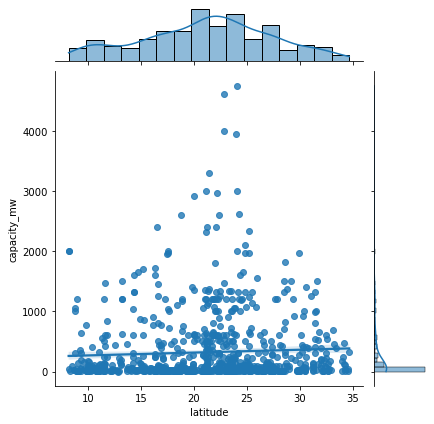

In [221]:
sns.jointplot(x="latitude",y="capacity_mw",kind="reg",data=df)

here showing that less point touch to the regressions line more point outside to the line also data are not normal distributions

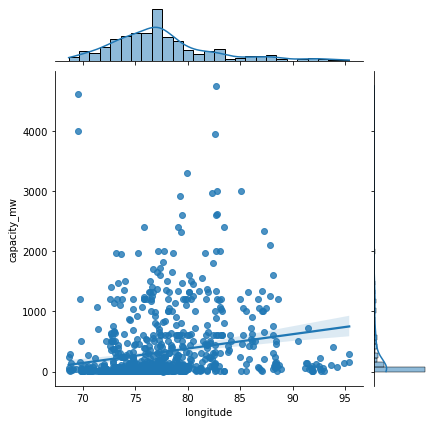

In [222]:
sns.jointplot(x="longitude",y="capacity_mw",kind="reg",data=df)

here showing that more point touch to the regressions line 

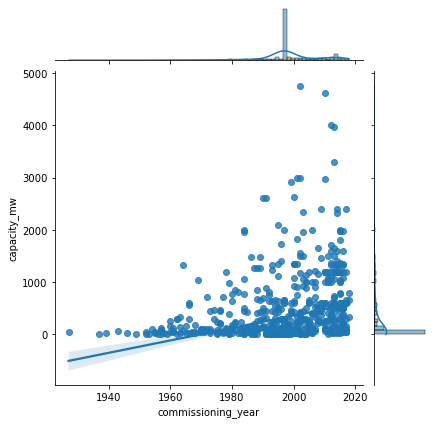

In [223]:
sns.jointplot(x="commissioning_year",y="capacity_mw",kind="reg",data=df)

here showing that more point touch to the regressions line 

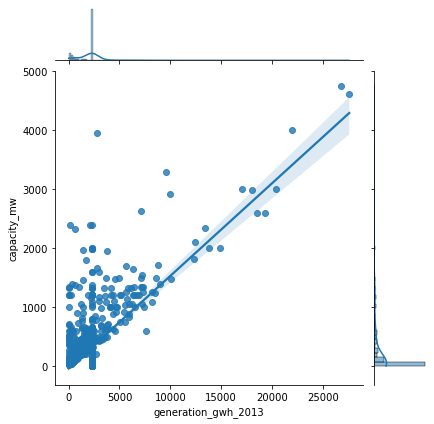

In [224]:
sns.jointplot(x="generation_gwh_2013",y="capacity_mw",kind="reg",data=df)

here showing that more point touch to the regressions line less point outside to the line

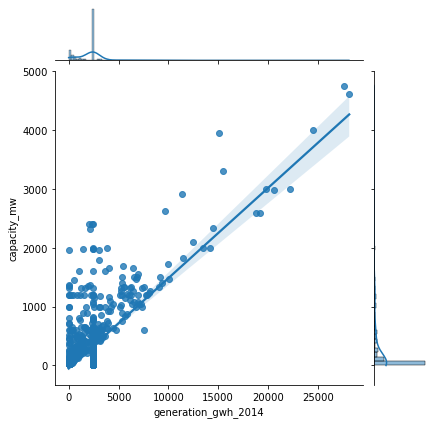

In [225]:
sns.jointplot(x="generation_gwh_2014",y="capacity_mw",kind="reg",data=df)

here showing that more point touch to the regressions line less point outside to the line

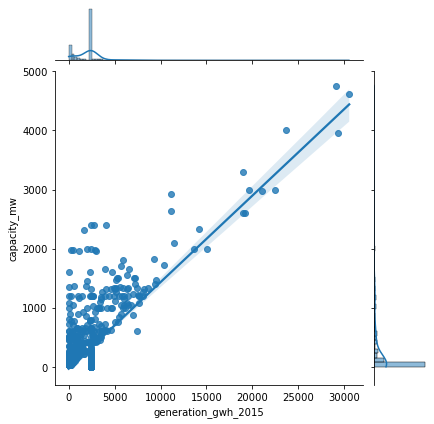

In [226]:
sns.jointplot(x="generation_gwh_2015",y="capacity_mw",kind="reg",data=df)

here showing that more point touch to the regressions line less point outside to the line

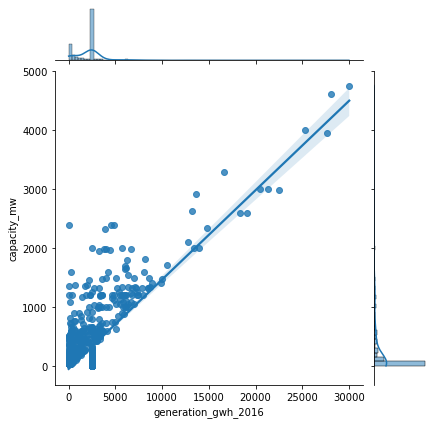

In [227]:
sns.jointplot(x="generation_gwh_2016",y="capacity_mw",kind="reg",data=df)

here showing that more point touch to the regressions line less point outside to the line

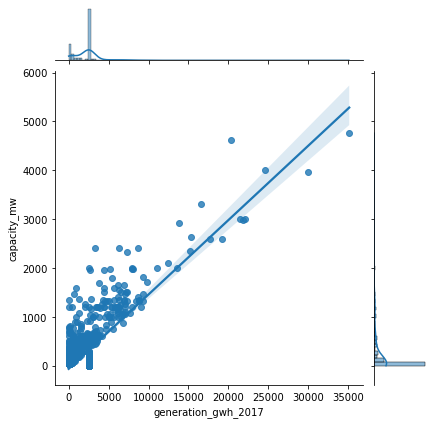

In [228]:
sns.jointplot(x="generation_gwh_2017",y="capacity_mw",kind="reg",data=df)

here showing that more point touch to the regressions line less point outside to the line

<AxesSubplot:xlabel='capacity_mw'>

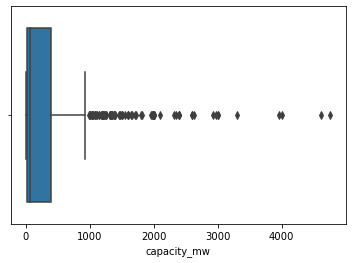

In [229]:
sns.boxplot(df['capacity_mw'])

here showing that capacity in mw min value is 0 and max value is 1000 also outliers are present in this columns

<AxesSubplot:xlabel='latitude'>

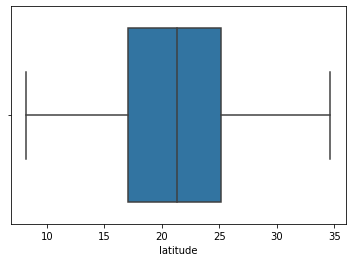

In [230]:
sns.boxplot(df['latitude'])

here showing that min value is 0 and max value is 35 also no outliers are present in this columns

<AxesSubplot:xlabel='longitude'>

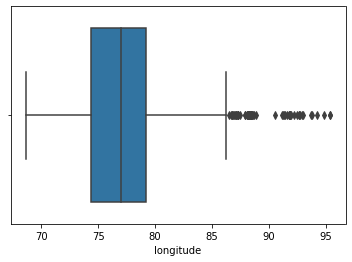

In [231]:
sns.boxplot(df['longitude'])

here showing that min value is 65 and max value is 85 and outliers are present in this columns

<AxesSubplot:xlabel='commissioning_year'>

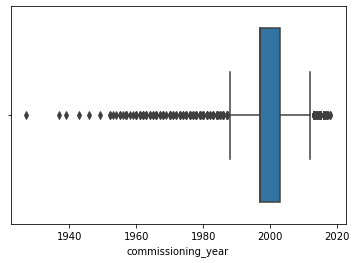

In [232]:
sns.boxplot(df['commissioning_year'])

here showing that min value is 1980 and max value is 2020 and density of 2000year is more also outliers are present in this columns

<AxesSubplot:xlabel='generation_gwh_2013'>

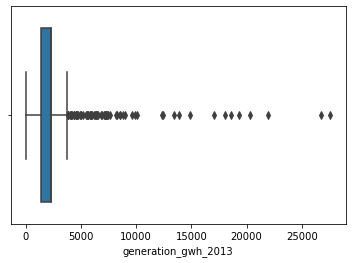

In [233]:
sns.boxplot(df['generation_gwh_2013'])

here showing that generation growth is 2013 min value is 0 and max value is 3000 and also outliers are present in this columns

<AxesSubplot:xlabel='generation_gwh_2014'>

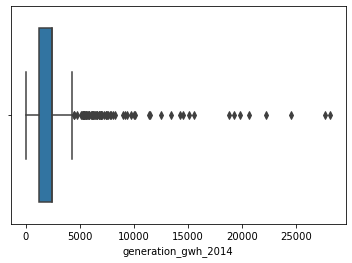

In [234]:
sns.boxplot(df['generation_gwh_2014'])

here showing that generation growth is 2014 min value is 0 and max value is 2000 and also outliers are present in this columns

<AxesSubplot:xlabel='generation_gwh_2015'>

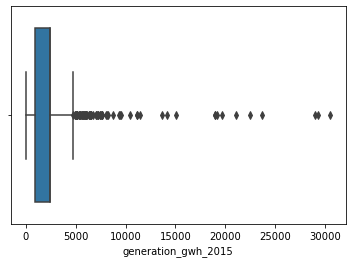

In [235]:
sns.boxplot(df['generation_gwh_2015'])

here showing that generation growth is 2015 min value is 0 and max value is 5000 and also outliers are present in this columns

<AxesSubplot:xlabel='generation_gwh_2016'>

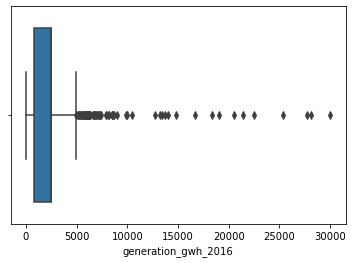

In [236]:
sns.boxplot(df['generation_gwh_2016'])

here showing that generation growth is 2016 min value is 0 and max value is 5000 and also outliers are present in this columns

<AxesSubplot:xlabel='generation_gwh_2017'>

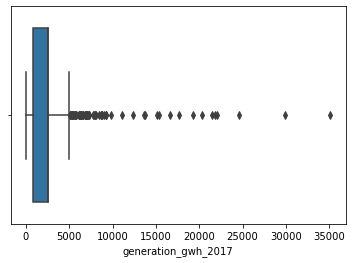

In [237]:
sns.boxplot(df['generation_gwh_2017'])

here showing that generation growth is 2017 min value is 0 and max value is 5000 and also outliers are present in this columns

# Feature Encoding

In [238]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [239]:
for val in categorical_features:
    le=LabelEncoder()
    df[val]=le.fit_transform(df[val].astype(str))

In [240]:
df[categorical_features].head()

country  country_long  primary_fuel  geolocation_source  \
0        0             0             6                   1   
1        0             0             1                   2   
2        0             0             7                   2   
3        0             0             2                   2   
4        0             0             1                   2   

   generation_data_source  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

# Correlations

In [241]:
dfc=df.corr()
dfc

country  country_long  capacity_mw  latitude  \
country                     NaN           NaN          NaN       NaN   
country_long                NaN           NaN          NaN       NaN   
capacity_mw                 NaN           NaN     1.000000  0.049790   
latitude                    NaN           NaN     0.049790  1.000000   
longitude                   NaN           NaN     0.197124  0.031501   
primary_fuel                NaN           NaN    -0.377783 -0.013453   
commissioning_year          NaN           NaN     0.265827  0.095050   
geolocation_source          NaN           NaN     0.204698 -0.183999   
year_of_capacity_data       NaN           NaN          NaN       NaN   
generation_gwh_2013         NaN           NaN     0.667842  0.036639   
generation_gwh_2014         NaN           NaN     0.705434  0.044085   
generation_gwh_2015         NaN           NaN     0.722081  0.036127   
generation_gwh_2016         NaN           NaN     0.752829  0.030932   
generation_gwh_2017         NaN           NaN     0.767040  0.030655   
generation_data_source      NaN           NaN          NaN       NaN   

                        longitude  primary_fuel  commissioning_year  \
country                       NaN           NaN                 NaN   
country_long                  NaN           NaN                 NaN   
capacity_mw              0.197124     -0.377783            0.265827   
latitude                 0.031501     -0.013453            0.095050   
longitude                1.000000     -0.348710            0.086054   
primary_fuel            -0.348710      1.000000           -0.123060   
commissioning_year       0.086054     -0.123060            1.000000   
geolocation_source       0.252415     -0.482803           -0.007959   
year_of_capacity_data         NaN           NaN                 NaN   
generation_gwh_2013      0.014021     -0.120512            0.110848   
generation_gwh_2014      0.011669     -0.125000            0.134305   
generation_gwh_2015      0.019176     -0.125138            0.149304   
generation_gwh_2016      0.039758     -0.131358            0.172698   
generation_gwh_2017      0.040407     -0.132174            0.173400   
generation_data_source        NaN           NaN                 NaN   

                        geolocation_source  year_of_capacity_data  \
country                                NaN                    NaN   
country_long                           NaN                    NaN   
capacity_mw                   2.046977e-01                    NaN   
latitude                     -1.839986e-01                    NaN   
longitude                     2.524152e-01                    NaN   
primary_fuel                 -4.828029e-01                    NaN   
commissioning_year           -7.959048e-03                    NaN   
geolocation_source            1.000000e+00                    NaN   
year_of_capacity_data                  NaN                    NaN   
generation_gwh_2013           5.076682e-17                    NaN   
generation_gwh_2014          -1.720640e-17                    NaN   
generation_gwh_2015           1.078291e-17                    NaN   
generation_gwh_2016           6.031622e-17                    NaN   
generation_gwh_2017           8.740941e-17                    NaN   
generation_data_source                 NaN                    NaN   

                        generation_gwh_2013  generation_gwh_2014  \
country                                 NaN                  NaN   
country_long                            NaN                  NaN   
capacity_mw                    6.678419e-01         7.054341e-01   
latitude                       3.663949e-02         4.408464e-02   
longitude                      1.402097e-02         1.166872e-02   
primary_fuel                  -1.205116e-01        -1.249997e-01   
commissioning_year             1.108482e-01         1.343054e-01   
geolocation_source             5.076682e-17        -1.720640e-17   
year_of_capacity_

<AxesSubplot:>

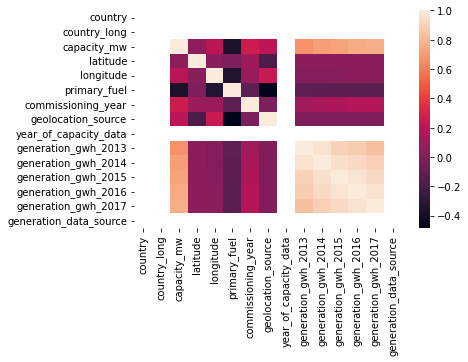

In [242]:
sns.heatmap(dfc)

<AxesSubplot:>

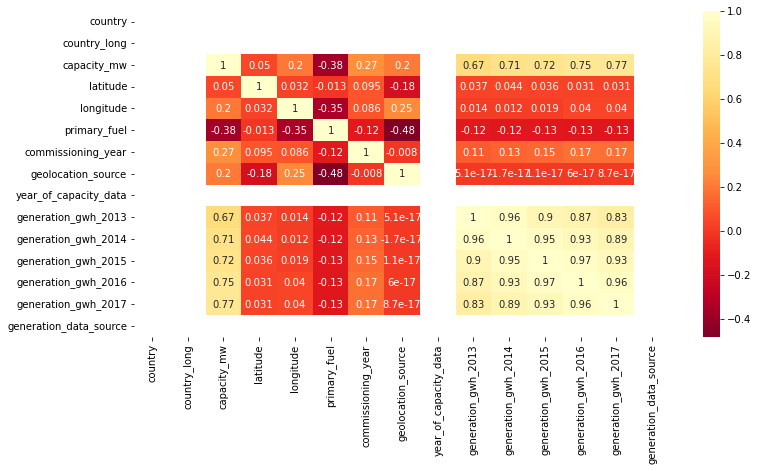

In [243]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(dfc,cmap="YlOrRd_r",annot=True)

# observations:
    generation_gwh_2013 and generation_gwh_2014 columns are correlated with each other 0.96 and 0.96
    generation_gwh_2014 and generation_gwh_2015 columns are correlated with each other 0.95 and 0.95
    generation_gwh_2014 and generation_gwh_2016 columns are correlated with each other 0.93 and 0.93
    generation_gwh_2015 and generation_gwh_2017 columns are correlated with each other 0.93 and 0.93
    generation_gwh_2014 and generation_gwh_2017 columns are correlated with each other 0.89 and 0.89
    generation_gwh_2013 and generation_gwh_2016 columns are correlated with each other 0.83 and 0.83
    generation_gwh_2013 and generation_gwh_2014 columns are correlated with each other 0.96 and 0.96
    generation_gwh_2013 and capacity_mw columns are correlated with each other 0.67 and 0.67
    generation_gwh_2014 and capacity_mw columns are correlated with each other 0.71 and 0.71
    generation_gwh_2015 and capacity_mw columns are correlated with each other 0.72 and 0.72
    generation_gwh_2016 and capacity_mw columns are correlated with each other 0.75 and 0.75
    generation_gwh_2017 and capacity_mw columns are correlated with each other 0.77 and 0.77

# Removing the outliers

In [244]:
from scipy.stats import zscore
import numpy as np

In [245]:
z=np.abs(zscore(df))
z

country  country_long  capacity_mw  latitude  longitude  primary_fuel  \
0        NaN           NaN     0.549311  1.148396   0.880420      1.225418   
1        NaN           NaN     0.384628  0.586730   0.594079      0.967486   
2        NaN           NaN     0.486024  0.116292   1.689763      1.663998   
3        NaN           NaN     0.320824  0.439625   2.911407      0.528905   
4        NaN           NaN     2.550350  0.125578   1.038230      0.967486   
..       ...           ...          ...       ...        ...           ...   
903      NaN           NaN     2.205464  0.805503   0.019053      0.967486   
904      NaN           NaN     0.548448  1.364556   0.150161      1.225418   
905      NaN           NaN     0.509649  0.972987   0.390650      1.663998   
906      NaN           NaN     0.415667  0.518313   0.774322      0.967486   
907      NaN           NaN     0.525169  1.850820   0.006059      1.663998   

     commissioning_year  geolocation_source  year_of_capacity_data  \
0          1.087424e+00            1.084288                    NaN   
1          1.750689e-14            0.393991                    NaN   
2          1.750689e-14            0.393991                    NaN   
3          5.484515e-01            0.393991                    NaN   
4          1.395409e+00            0.393991                    NaN   
..                  ...                 ...                    ...   
903        1.472405e+00            0.393991                    NaN   
904        1.750689e-14            2.562566                    NaN   
905        1.750689e-14            0.393991                    NaN   
906        1.750689e-14            0.393991                    NaN   
907        1.750689e-14            0.393991                    NaN   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0               0.000000         1.707079e-16             0.000000   
1               0.000000         1.707079e-16             0.000000   
2               0.000000         1.707079e-16             0.000000   
3               0.678528         6.766806e-01             0.549339   
4               0.257963         2.309240e-01             1.225192   
..                   ...                  ...                  ...   
903             0.000000         1.707079e-16             0.844155   
904             0.000000         1.707079e-16             0.000000   
905             0.000000         1.707079e-16             0.000000   
906             0.000000         1.707079e-16             0.000000   
907             0.000000         1.707079e-16             0.000000   

     generation_gwh_2016  generation_gwh_2017  generation_data_source  
0           1.580551e-16         1.556591e-16                     NaN  
1           1.580551e-16         1.556591e-16                     NaN  
2           1.580551e-16         1.556591e-16                     NaN  
3           5.449611e-01         6.394057e-01                     NaN  
4           1.316953e+00         9.768586e-01                     NaN  
..                   ...                  ...                     ...  
903         7.717164e-01         5.703897e-01                     NaN  
904         1.580551e-16         1.556591e-16                     NaN  
905         1.580551e-16         1.556591e-16                     NaN  
906         1.580551e-16         1.556591e-16                     NaN  
907         1.580551e-16         1.556591e-16                     NaN  

[908 rows x 15 columns]

The abs() function of Pythons standard library returns the absolute value of the given number. Absolute value of a number is the value without considering its sign. Hence absolute of 10 is 10, -10 is also 10. If the number is a complex number, abs() returns its magnitude.
It will make all the data positive


In [246]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
       184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
       309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
       365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
       494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
       530, 533, 539, 542, 547, 575, 584, 602, 622, 639, 649, 649, 649,
       649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696,
       696, 707, 710, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727,
       727, 727, 727, 727, 727, 729, 787, 787, 787, 787, 787, 787, 789,
       808, 809, 809, 809, 809, 809, 819, 848, 849, 849, 881, 881, 881,
       881, 881, 881], dtype=int64), array([ 2, 11, 12, 13,  2,  9, 10, 11, 12, 13,  9, 10,  4,  4,  2,  9, 10,
       11, 12, 13,  6,  4,  4,  2,  9, 10, 11, 12, 13,  4,  4,  4,  6,  4,
        2,  2,  9, 10, 11, 12, 13,  6,  2,  4,  4,  4,  6,  6,  6,  2,  6,
        2,  9, 10

In [247]:
Q1=df.quantile(0.25)
Q1

country                      0.000000
country_long                 0.000000
capacity_mw                 16.837500
latitude                    17.057825
longitude                   74.390250
primary_fuel                 1.000000
commissioning_year        1996.876894
geolocation_source           2.000000
year_of_capacity_data     2018.000000
generation_gwh_2013       1332.538825
generation_gwh_2014       1175.264825
generation_gwh_2015        874.205000
generation_gwh_2016        826.629750
generation_gwh_2017        852.438887
generation_data_source       0.000000
Name: 0.25, dtype: float64

In [248]:
Q3=df.quantile(0.75)
Q3

country                      0.000000
country_long                 0.000000
capacity_mw                388.125000
latitude                    25.183775
longitude                   79.211600
primary_fuel                 6.000000
commissioning_year        2003.000000
geolocation_source           2.000000
year_of_capacity_data     2018.000000
generation_gwh_2013       2304.059202
generation_gwh_2014       2420.393316
generation_gwh_2015       2414.072373
generation_gwh_2016       2453.936292
generation_gwh_2017       2531.754458
generation_data_source       0.000000
Name: 0.75, dtype: float64

In [249]:
IQR=Q3-Q1
IQR

country                      0.000000
country_long                 0.000000
capacity_mw                371.287500
latitude                     8.125950
longitude                    4.821350
primary_fuel                 5.000000
commissioning_year           6.123106
geolocation_source           0.000000
year_of_capacity_data        0.000000
generation_gwh_2013        971.520377
generation_gwh_2014       1245.128491
generation_gwh_2015       1539.867373
generation_gwh_2016       1627.306542
generation_gwh_2017       1679.315570
generation_data_source       0.000000
dtype: float64

In [250]:
# REMOVING OUTLIERS USING IQR METHOD
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new

country  country_long  capacity_mw  latitude  longitude  primary_fuel  \
1          0             0         98.0   24.7663    74.6090             1   
2          0             0         39.2   21.9038    69.3732             7   
5          0             0        250.0   23.7689    68.6447             1   
7          0             0        192.0   32.2258    77.2070             3   
8          0             0        290.0   16.3300    75.8863             3   
..       ...           ...          ...       ...        ...           ...   
901        0             0         16.0   17.1653    74.2456             0   
902        0             0        106.6   13.1156    77.5838             5   
905        0             0         25.5   15.2758    75.5811             7   
906        0             0         80.0   24.3500    73.7477             1   
907        0             0         16.5    9.9344    77.4768             7   

     commissioning_year  geolocation_source  year_of_capacity_data  \
1           1996.876894                   2                 2018.0   
2           1996.876894                   2                 2018.0   
5           2005.000000                   2                 2018.0   
7           2010.000000                   2                 2018.0   
8           2004.000000                   2                 2018.0   
..                  ...                 ...                    ...   
901         1996.876894                   2                 2018.0   
902         1993.000000                   2                 2018.0   
905         1996.876894                   2                 2018.0   
906         1996.876894                   2                 2018.0   
907         1996.876894                   2                 2018.0   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
1            2304.059202          2420.393316          2414.072373   
2            2304.059202          2420.393316          2414.072373   
5             821.798000          1153.421000          1208.852000   
7             696.738800           674.391100           721.335200   
8             504.813250           480.594950           144.434200   
..                   ...                  ...                  ...   
901          2304.059202          2420.393316          2414.072373   
902            20.900000             0.000000             0.000000   
905          2304.059202          2420.393316          2414.072373   
906          2304.059202          2420.393316          2414.072373   
907          2304.059202          2420.393316          2414.072373   

     generation_gwh_2016  generation_gwh_2017  generation_data_source  
1            2453.936292          2531.754458                       0  
2            2453.936292          2531.754458                       0  
5            1175.765000          1147.913000                       0  
7             675.724400           679.594950                       0  
8             402.029750           439.372100                       0  
..                   ...                  ...                     ...  
901          2453.936292          2531.754458                       0  
902             0.000000          2531.754458                       0  
905          2453.936292          2531.754458                       0  
906          2453.936292          2531.754458                       0  
907          2453.936292          2531.754458                       0  

[457 rows x 15 columns]

In [251]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (908, 15)
shape after          : (457, 15)
Percentage Loss      : 0.4966960352422907


In [252]:
y=df_new["capacity_mw"]
y

1       98.0
2       39.2
5      250.0
7      192.0
8      290.0
       ...  
901     16.0
902    106.6
905     25.5
906     80.0
907     16.5
Name: capacity_mw, Length: 457, dtype: float64

In [253]:
x=df_new.drop(['capacity_mw'],axis=1)
x

country  country_long  latitude  longitude  primary_fuel  \
1          0             0   24.7663    74.6090             1   
2          0             0   21.9038    69.3732             7   
5          0             0   23.7689    68.6447             1   
7          0             0   32.2258    77.2070             3   
8          0             0   16.3300    75.8863             3   
..       ...           ...       ...        ...           ...   
901        0             0   17.1653    74.2456             0   
902        0             0   13.1156    77.5838             5   
905        0             0   15.2758    75.5811             7   
906        0             0   24.3500    73.7477             1   
907        0             0    9.9344    77.4768             7   

     commissioning_year  geolocation_source  year_of_capacity_data  \
1           1996.876894                   2                 2018.0   
2           1996.876894                   2                 2018.0   
5           2005.000000                   2                 2018.0   
7           2010.000000                   2                 2018.0   
8           2004.000000                   2                 2018.0   
..                  ...                 ...                    ...   
901         1996.876894                   2                 2018.0   
902         1993.000000                   2                 2018.0   
905         1996.876894                   2                 2018.0   
906         1996.876894                   2                 2018.0   
907         1996.876894                   2                 2018.0   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
1            2304.059202          2420.393316          2414.072373   
2            2304.059202          2420.393316          2414.072373   
5             821.798000          1153.421000          1208.852000   
7             696.738800           674.391100           721.335200   
8             504.813250           480.594950           144.434200   
..                   ...                  ...                  ...   
901          2304.059202          2420.393316          2414.072373   
902            20.900000             0.000000             0.000000   
905          2304.059202          2420.393316          2414.072373   
906          2304.059202          2420.393316          2414.072373   
907          2304.059202          2420.393316          2414.072373   

     generation_gwh_2016  generation_gwh_2017  generation_data_source  
1            2453.936292          2531.754458                       0  
2            2453.936292          2531.754458                       0  
5            1175.765000          1147.913000                       0  
7             675.724400           679.594950                       0  
8             402.029750           439.372100                       0  
..                   ...                  ...                     ...  
901          2453.936292          2531.754458                       0  
902             0.000000          2531.754458                       0  
905          2453.936292          2531.754458                       0  
906          2453.936292          2531.754458                       0  
907          2453.936292          2531.754458                       0  

[457 rows x 14 columns]

In [254]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 

In [255]:
#apply fearure selection and specifying the lasso Regression model and selected a suitable alpha
#bigger the alpha less fearure that will be selected 
# then i use the selectfrommodel object from sklearn which will select the fearures which cofficients are non-zero

feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0)) #remember that to set the seed value of random state
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [256]:
feature_sel_model.get_support()

array([False, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False])

In [257]:
#lets print the number of total and selected features
selected_feat=x.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 14
selected features: 9
features with coefficients shrank to zero: 5


In [258]:
selected_feat

Index(['latitude', 'longitude', 'primary_fuel', 'commissioning_year',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [259]:
x_train=x[selected_feat]
x_train

latitude  longitude  primary_fuel  commissioning_year  \
1     24.7663    74.6090             1         1996.876894   
2     21.9038    69.3732             7         1996.876894   
5     23.7689    68.6447             1         2005.000000   
7     32.2258    77.2070             3         2010.000000   
8     16.3300    75.8863             3         2004.000000   
..        ...        ...           ...                 ...   
901   17.1653    74.2456             0         1996.876894   
902   13.1156    77.5838             5         1993.000000   
905   15.2758    75.5811             7         1996.876894   
906   24.3500    73.7477             1         1996.876894   
907    9.9344    77.4768             7         1996.876894   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
1            2304.059202          2420.393316          2414.072373   
2            2304.059202          2420.393316          2414.072373   
5             821.798000          1153.421000          1208.852000   
7             696.738800           674.391100           721.335200   
8             504.813250           480.594950           144.434200   
..                   ...                  ...                  ...   
901          2304.059202          2420.393316          2414.072373   
902            20.900000             0.000000             0.000000   
905          2304.059202          2420.393316          2414.072373   
906          2304.059202          2420.393316          2414.072373   
907          2304.059202          2420.393316          2414.072373   

     generation_gwh_2016  generation_gwh_2017  
1            2453.936292          2531.754458  
2            2453.936292          2531.754458  
5            1175.765000          1147.913000  
7             675.724400           679.594950  
8             402.029750           439.372100  
..                   ...                  ...  
901          2453.936292          2531.754458  
902             0.000000          2531.754458  
905          2453.936292          2531.754458  
906          2453.936292          2531.754458  
907          2453.936292          2531.754458  

[457 rows x 9 columns]

In [260]:
y_train=df_new['capacity_mw']
y_train

1       98.0
2       39.2
5      250.0
7      192.0
8      290.0
       ...  
901     16.0
902    106.6
905     25.5
906     80.0
907     16.5
Name: capacity_mw, Length: 457, dtype: float64

In [261]:
train_y=df_new["primary_fuel"]
train_y

1      1
2      7
5      1
7      3
8      3
      ..
901    0
902    5
905    7
906    1
907    7
Name: primary_fuel, Length: 457, dtype: int32

In [262]:
train_x=x[selected_feat]
train_x

latitude  longitude  primary_fuel  commissioning_year  \
1     24.7663    74.6090             1         1996.876894   
2     21.9038    69.3732             7         1996.876894   
5     23.7689    68.6447             1         2005.000000   
7     32.2258    77.2070             3         2010.000000   
8     16.3300    75.8863             3         2004.000000   
..        ...        ...           ...                 ...   
901   17.1653    74.2456             0         1996.876894   
902   13.1156    77.5838             5         1993.000000   
905   15.2758    75.5811             7         1996.876894   
906   24.3500    73.7477             1         1996.876894   
907    9.9344    77.4768             7         1996.876894   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
1            2304.059202          2420.393316          2414.072373   
2            2304.059202          2420.393316          2414.072373   
5             821.798000          1153.421000          1208.852000   
7             696.738800           674.391100           721.335200   
8             504.813250           480.594950           144.434200   
..                   ...                  ...                  ...   
901          2304.059202          2420.393316          2414.072373   
902            20.900000             0.000000             0.000000   
905          2304.059202          2420.393316          2414.072373   
906          2304.059202          2420.393316          2414.072373   
907          2304.059202          2420.393316          2414.072373   

     generation_gwh_2016  generation_gwh_2017  
1            2453.936292          2531.754458  
2            2453.936292          2531.754458  
5            1175.765000          1147.913000  
7             675.724400           679.594950  
8             402.029750           439.372100  
..                   ...                  ...  
901          2453.936292          2531.754458  
902             0.000000          2531.754458  
905          2453.936292          2531.754458  
906          2453.936292          2531.754458  
907          2453.936292          2531.754458  

[457 rows x 9 columns]

# Preprocessing of data

In [263]:
from sklearn.preprocessing import power_transform

In [264]:
df_new=power_transform(x,method="yeo-johnson")
df_new

array([[ 0.        ,  0.        ,  0.82847293, ...,  0.55841923,
         0.54610012,  0.        ],
       [ 0.        ,  0.        ,  0.37104976, ...,  0.55841923,
         0.54610012,  0.        ],
       [ 0.        ,  0.        ,  0.67081051, ..., -0.71322799,
        -0.82747912,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.75705159, ...,  0.55841923,
         0.54610012,  0.        ],
       [ 0.        ,  0.        ,  0.76288134, ...,  0.55841923,
         0.54610012,  0.        ],
       [ 0.        ,  0.        , -1.76584288, ...,  0.55841923,
         0.54610012,  0.        ]])

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, power_transform supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the transformed data.

In [265]:
x.shape[1]

14

In [266]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [267]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['variables']=x.columns
    return(vif)

In [268]:
vif_calc(x)

VIF Factor               variables
0          NaN                 country
1          NaN            country_long
2     1.070234                latitude
3     1.207473               longitude
4     1.149806            primary_fuel
5     1.242445      commissioning_year
6     0.000000      geolocation_source
7     0.000000   year_of_capacity_data
8    25.091019     generation_gwh_2013
9    37.755442     generation_gwh_2014
10   34.398472     generation_gwh_2015
11   27.591952     generation_gwh_2016
12   10.400123     generation_gwh_2017
13         NaN  generation_data_source

 The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given models betas divide by the variane of a single beta if it were fit alone.
The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient.
...
A rule of thumb for interpreting the variance inflation factor:
1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.


In [269]:
from sklearn.preprocessing import StandardScaler

In [270]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.        ,  0.        ,  0.81805068, ...,  0.55770333,
         0.5459297 ,  0.        ],
       [ 0.        ,  0.        ,  0.33670567, ...,  0.55770333,
         0.5459297 ,  0.        ],
       [ 0.        ,  0.        ,  0.65033242, ..., -0.78371697,
        -0.88081394,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.77782871, ...,  0.55770333,
         0.5459297 ,  0.        ],
       [ 0.        ,  0.        ,  0.74804756, ...,  0.55770333,
         0.5459297 ,  0.        ],
       [ 0.        ,  0.        , -1.67601428, ...,  0.55770333,
         0.5459297 ,  0.        ]])

# Machine learning models


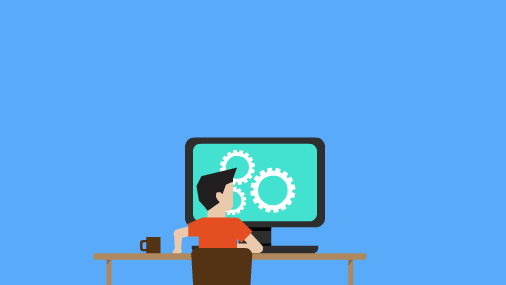

In the previuos seciton we have made X as the features and y as capacity_mw   - the target value we want to predict.



# Assumptions:
    .This is a Linear Regression problem so we will use Regression algorithm .

    .Train test split will be a 75:25 ratio respectively.





# Models we will use:
    .LinearRegression
    .Lasso
    .Ridge
    .ElasticNet
    .DecisionTreeRegressor
    .KNeighborRegressor
    .SupportVectorRegressor
    .SGDRegressor
    .RandomForestRegressor
    .AdaBoostRegressor
    .GradientBoostRegressor
    .XGBRegressor

# r2_score:
    (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0


In statistics, the coefficient of determination, denoted R² or r² and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable.
The coefficient of determination can also be found with the following formula: R2 = MSS/TSS = (TSS − RSS)/TSS, where MSS is the model sum of squares (also known as ESS, or explained sum of squares), which is the sum of the squares of the prediction from the linear regression minus the mean for that variable; TSS is the total sum of squares associated with the outcome variable, which is the sum of the squares of the measurements minus their mean; and RSS is the residual sum of squares, which is the sum of the squares of the measurements minus the prediction from the linear regression

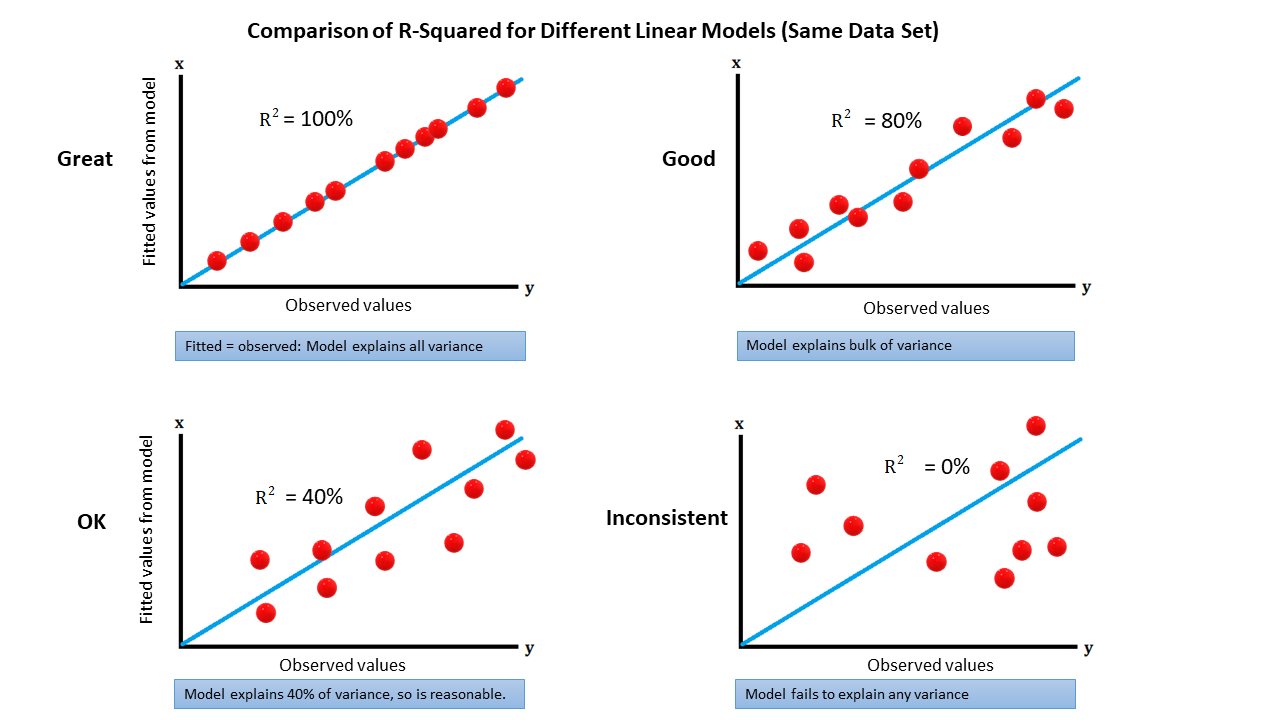

# coss_val_score:
    Cross-validation is a statistical method used to estimate the skill of machine learning models. ... That k-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset.


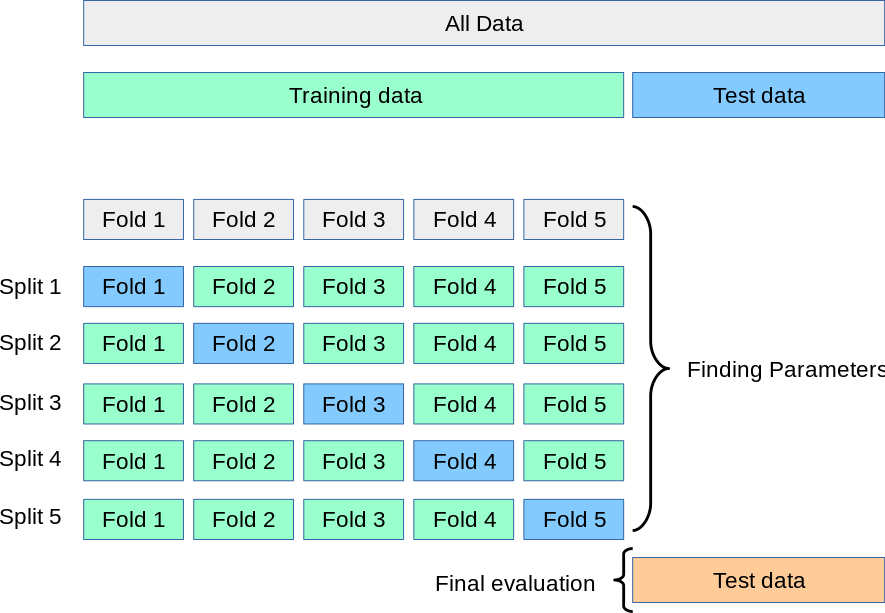

# Mean_squared_error:
    The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. ... The lower the MSE, the better the forecast.


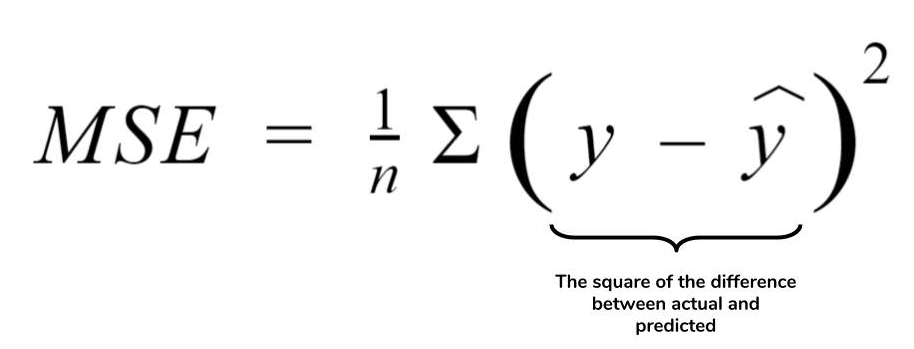

# Mean_absolute_error:
    In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. ... This is known as a scale-dependent accuracy measure and therefore cannot be used to make comparisons between series using different scales.

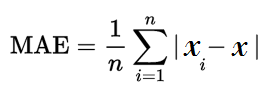

# Root_mean_squared_error:
    Root mean squared error (RMSE) is the square root of the mean of the square of all of the error. The use of RMSE is very common, and it is considered an excellent general-purpose error metric for numerical predictions.


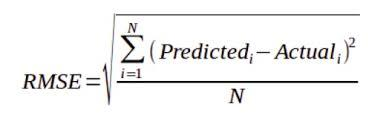

# LinearRegression:
    Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. 



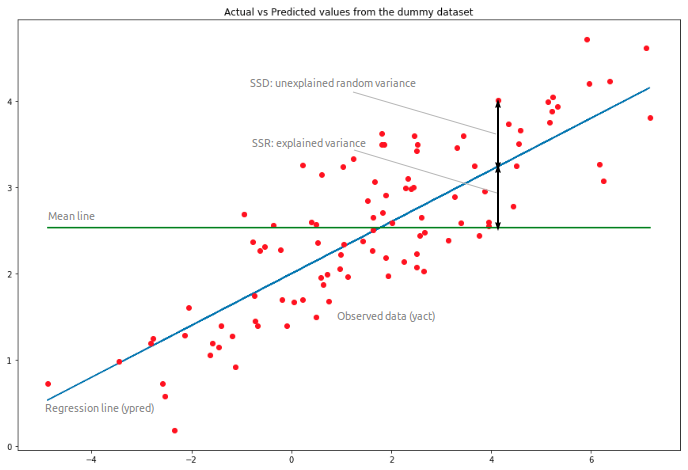

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=0)


In [639]:
x_train.shape

(342, 9)

In [640]:
y_train.shape

(342,)

In [641]:
x_test.shape

(115, 9)

In [642]:
y_test.shape

(115,)

In [126]:
from sklearn.model_selection import GridSearchCV


In [644]:
parameters={'fit_intercept': (False,True),'normalize': (True, False),'copy_X': (False, True),'positive': (True,False)}
lr=LinearRegression()
gds=GridSearchCV(lr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': (False, True),
                         'fit_intercept': (False, True),
                         'normalize': (True, False),
                         'positive': (True, False)})

In [645]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'copy_X': False, 'fit_intercept': True, 'normalize': False, 'positive': True}


In [646]:
param_grid={
    'n_jobs': list(range(1,100))}


In [647]:
lr=LinearRegression()
gds=GridSearchCV(lr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                    14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                    25, 26, 27, 28, 29, 30, ...]})

In [648]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_jobs': 1}


In [729]:
lr=LinearRegression(copy_X=False,fit_intercept=True,normalize=False,positive=True,n_jobs=1)
lr.fit(x_train,y_train)
lr.coef_

array([ 7.50654018, 11.52435603,  0.        ,  4.47670408,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [730]:
lr.intercept_

-9849.531572567297

In [731]:
pred=lr.predict(x_test)

In [732]:
print("predicted value",pred)
print("actual value",y_test)

predicted value [ 56.46640203  96.62253059  77.83823262  93.43525085  49.46861773
 159.2921721  138.56296027 150.60904731 112.86573816  79.54811133
  68.87174772 129.74681836  54.54578223  56.76391861  75.3132261
  83.67710403 137.75933068  57.33855594  52.46069841 130.94154875
  53.79856653  79.18042185  75.39020602  82.86852311 135.99622953
 268.65623765 152.6896039   71.0588946  150.3867958   59.76740045
  74.71325688 232.8180421   92.78341183 200.12990495 124.18626419
  74.75176023 200.63080338 189.84390407 138.91467992  77.14569331
  71.99272496  69.11185949 233.0679495  199.47846301  88.30874871
 217.91540193 216.22056295 105.83436534  86.40459966  76.21267214
  57.13705907  96.52722282  60.59220773 208.834084    77.96550986
 214.07037232 155.52319272  52.87744438 123.17028555 105.79981848
  82.13786353 151.31225476  59.95622098 172.53739403  51.14210672
  65.09576078 239.8616457  104.79005311  64.43496177 141.54197109
  82.42689845 152.88372068  62.15265423  77.10077626  76.2484

In [733]:
print("error")
print("Mean absolute error of lr:",mean_absolute_error(y_test,pred))
print("Mean squared error of lr:",mean_squared_error(y_test,pred))
print("Root Mean squared error of lr:",np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error of lr: 100.96973594368006
Mean squared error of lr: 21401.03913328793
Root Mean squared error of lr: 146.2909400246233


In [734]:
print(r2_score(y_test,pred))
print(lr.score(x_train,y_train))

0.2331151742383908
0.13255158171204684


In [735]:
scores = cross_val_score(lr, x_train, y_train, cv=5)
scores

array([-0.01370994, -0.00927129,  0.24486042,  0.17300901, -0.01754323])

In [736]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.08 accuracy with a standard deviation of 0.11


In [737]:
print(scores.mean())
print(scores.std())

0.07546899250722192
0.11134862381156163


# RidgeRegression:
    Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual value.


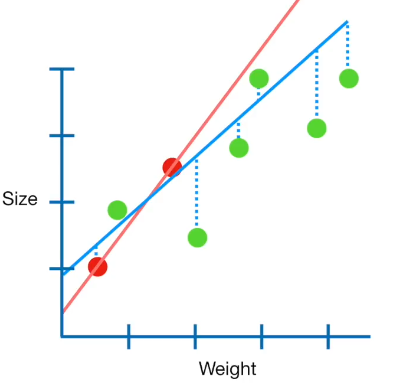

In [658]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [659]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0.005,0,1.0,1.1,1.5,1.2,1.3,1.4,1.6,1.7,1.8,1.9,1.10,0.10]}
rdg=Ridge()
gds=GridSearchCV(rdg,alphavalue)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.005, 0, 1.0,
                                   1.1, 1.5, 1.2, 1.3, 1.4, 1.6, 1.7, 1.8, 1.9,
                                   1.1, 0.1]})

In [660]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 1.9}


In [661]:
parameters={'fit_intercept': [False,True],'normalize': [True, False],'copy_X': [False, True],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
rdg=Ridge()
gds=GridSearchCV(rdg,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'copy_X': [False, True],
                         'fit_intercept': [False, True],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [662]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'copy_X': False, 'fit_intercept': True, 'normalize': True, 'solver': 'sag'}


In [663]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000,5000,10000,15000,20000]
}


In [664]:
rdg=Ridge()
gds=GridSearchCV(rdg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000,
                                      5000, 10000, 15000, 20000]})

In [665]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 100}


In [666]:
param_grid={'random_state': list(range(1,100)),
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0,0.14,0.18]
}

In [667]:
rdg=Ridge()
gds=GridSearchCV(rdg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0, 0.14,
                                 0.18]})

In [668]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1, 'tol': 0.1}


In [721]:
rdg=Ridge(alpha=0.005,copy_X=False,fit_intercept=True,normalize=True,solver='sag',random_state=1,tol=0.1,max_iter=100)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.1553350655589104

In [722]:
rdg.coef_

array([ 8.13500491e+00,  1.27329709e+01, -8.98673187e+00,  6.27833624e+00,
        9.30446944e-02,  2.89465114e-02,  8.02658333e-03, -1.72146458e-01,
        1.06121615e-02])

In [723]:
pred=rdg.predict(x_test)
pred

array([127.08095004,  75.47908536,   8.87820683,  89.93004933,
       101.77818602, 153.28869153, 302.00212751, 143.74135349,
        47.05178854,  51.96018272,  -1.00283449,  66.10775134,
       160.94883042, -12.48586286,   6.12295762,  62.64165225,
       128.72223098, -11.66666183, -16.92153164,  96.68600803,
       -17.47843682,  74.28748922,  24.82800461,  47.90080777,
       126.81722316, 435.02771985, 146.00450909,   2.33280084,
       143.50632067,  29.73218187,   6.92791455, 428.71086431,
        79.83892709, 357.66482982,  91.18588207,  24.092862  ,
       263.26149827, 272.51416952, 129.9605601 ,  72.05847039,
        48.03950584,  31.2594957 , 450.30403212, 197.05876564,
        75.15286291, 307.12292877, 348.00612713, 171.93922087,
        56.30497899,  70.99099946, 118.28111056,  30.16904766,
       -10.00410191, 257.08672977,   9.009607  , 312.68328201,
       208.91064521,   2.46918106, 307.27826009, 175.14633255,
        14.53202611, 144.49568322,  -8.89992357, 141.60

In [724]:
r2_score(y_test,pred)

0.3840983658607593

In [725]:
print("Mean squared error of rdg:",mean_squared_error(y_test,pred))
print('Mean absolute error of rdg:',mean_absolute_error(y_test,pred))
print('Root Mean squared error of rdg:',np.sqrt(mean_squared_error(y_test,pred)))

Mean squared error of rdg: 17187.633046956715
Mean absolute error of rdg: 83.74985672294792
Root Mean squared error of rdg: 131.10161344147033


In [726]:
scores = cross_val_score(rdg, x_train, y_train, cv=5)
scores

array([ 0.06633534, -0.15133208,  0.25702848,  0.17278687,  0.07047609])

In [727]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.08 accuracy with a standard deviation of 0.14


In [728]:
print(scores.mean())
print(scores.std())

0.08305893843180041
0.1368894871824216


# LassoRegresion:
    Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).


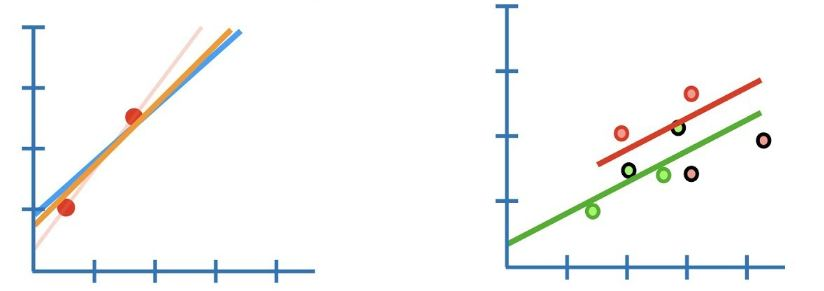

In [677]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0.005,0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,1.0,0.10],'precompute':['auto',True,False]}
lso=Lasso()
gds=GridSearchCV(lso,alphavalue)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.005, 0, 1.0,
                                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 1.0,
                                   0.1],
                         'precompute': ['auto', True, False]})

In [678]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 1.9, 'precompute': True}


In [679]:
parameters={'fit_intercept': (False,True),'normalize': (True, False),'copy_X': (False, True),'positive': (True,False),'selection':('cyclic', 'random')}
lso=Lasso()
gds=GridSearchCV(lso,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'copy_X': (False, True),
                         'fit_intercept': (False, True),
                         'normalize': (True, False), 'positive': (True, False),
                         'selection': ('cyclic', 'random')})

In [680]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'copy_X': False, 'fit_intercept': True, 'normalize': True, 'positive': False, 'selection': 'random'}


In [681]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000],
    'random_state': list(range(1,100)),
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0,0.14,0.18],
    'warm_start':[True,False]
}


In [682]:
lso=Lasso()
gds=GridSearchCV(lso,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0, 0.14,
                                 0.18],
                         'warm_start': [True, False]})

In [683]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 100, 'random_state': 1, 'tol': 1.0, 'warm_start': True}


In [707]:
lso=Lasso(alpha=0.005,copy_X=False,fit_intercept=True,normalize=True,positive=False,selection='random',random_state=1,tol=0.18,warm_start=True,max_iter=100,precompute=True )
lso.fit(x_train,y_train)
lso.score(x_train,y_train)
predlso=lso.predict(x_test)
r2_score(y_test,predlso)

0.30508988034716467

In [710]:
print(lso.score(x_train,y_train))  

0.20724093480179973


In [711]:
print("Mean squared error of lso:",mean_squared_error(y_test,predlso))
print('Mean absolute error of lso:',mean_absolute_error(y_test,predlso))
print('Root Mean squared error of lso:',np.sqrt(mean_squared_error(y_test,predlso)))

Mean squared error of lso: 19392.480024674678
Mean absolute error of lso: 90.51691413111772
Root Mean squared error of lso: 139.25688501713185


In [712]:
scores = cross_val_score(lso, x_train, y_train, cv=5)
scores

array([ 0.07181109, -0.22246512,  0.25071605,  0.16508373,  0.08772711])

In [713]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.07 accuracy with a standard deviation of 0.16


In [714]:
print(scores.mean())
print(scores.std())

0.07057457276071913
0.1597190880417512


# ElasticNetRegression:
    Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions. ... Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.


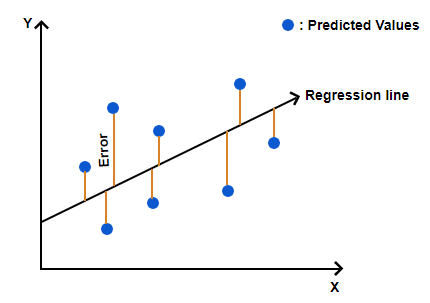

In [690]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0.005],'precompute':[True,False],'l1_ratio':[1.0,1.1,1.2,1.3,1.4,1.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6]}
enr=ElasticNet()
gds=GridSearchCV(enr,alphavalue)
gds.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.005],
                         'l1_ratio': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 0.0, 0.1,
                                      0.2, 0.3, 0.4, 0.5, 0.6],
                         'precompute': [True, False]})

In [691]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 1, 'l1_ratio': 0.0, 'precompute': False}


In [692]:
parameters={'fit_intercept': (False,True),'normalize': (True, False),'copy_X': (False, True),'positive': (True,False),'selection':('cyclic', 'random')}
enr=ElasticNet()
gds=GridSearchCV(enr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'copy_X': (False, True),
                         'fit_intercept': (False, True),
                         'normalize': (True, False), 'positive': (True, False),
                         'selection': ('cyclic', 'random')})

In [693]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'copy_X': False, 'fit_intercept': True, 'normalize': False, 'positive': True, 'selection': 'cyclic'}


In [694]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000],
    'random_state': list(range(1,100)),
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0,0.14,0.18],
    'warm_start':[bool,False]
}


In [695]:
enr=ElasticNet()
gds=GridSearchCV(enr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0, 0.14,
                                 0.18],
                         'warm_start': [<class 'bool'>, False]})

In [696]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 100, 'random_state': 1, 'tol': 1.0, 'warm_start': <class 'bool'>}


In [716]:
enr=ElasticNet(alpha=0.005,copy_X=False,fit_intercept=True,normalize=False,positive=True,selection='cyclic',random_state=1,max_iter=100,tol=0.1,warm_start=True,l1_ratio=0.0, precompute=False)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))

0.1325515695261824


In [717]:
r2_score(y_test,enrpred)

0.23307880877555576

In [738]:
enr.coef_

array([ 7.50526384, 11.5182188 ,  0.        ,  4.4769135 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [739]:
print("Mean squared error of enr:",mean_squared_error(y_test,enrpred))
print('Mean absolute error of enr:',mean_absolute_error(y_test,enrpred))
print('Root Mean squared error of enr:',np.sqrt(mean_squared_error(y_test,enrpred)))

Mean squared error of enr: 21402.053964546925
Mean absolute error of enr: 100.97615723801954
Root Mean squared error of enr: 146.29440852112882


In [740]:
scores = cross_val_score(enr, x_train, y_train, cv=5)
scores

array([-0.01374464, -0.00918457,  0.24490977,  0.17299867, -0.01749832])

In [741]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.08 accuracy with a standard deviation of 0.11


In [742]:
print(scores.mean())
print(scores.std())

0.07549618171661954
0.11134669303186173


# Approaching more regressor

# DecisionTreeRegressor:
    Decision Tree - Regression. Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.


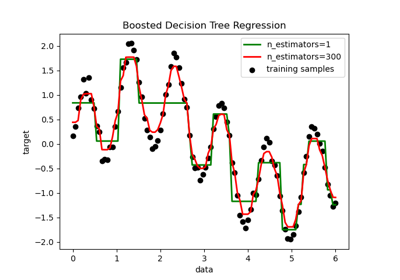

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [746]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10],  
              'min_samples_leaf': [1,2,3],
              'random_state': list(range(1,100))}


In [747]:
dtr=DecisionTreeRegressor()
gds=GridSearchCV(dtr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [748]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 3}


In [749]:
parameters={'criterion':('mse', 'friedman_mse', 'mae', 'poisson'),'splitter':('best', 'random'),'max_features': ('auto', 'sqrt', 'log2')} 
dtr=DecisionTreeRegressor()
gds=GridSearchCV(dtr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae', 'poisson'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')})

In [750]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}


In [751]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001],
    'min_impurity_decrease':[0.0,0.1,0.001,0.0001],
    'ccp_alpha':[0.1,0.001,0.0001,.1,1.0]
}

In [752]:
dtr=DecisionTreeRegressor()
gds=GridSearchCV(dtr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None],
                         'min_impurity_decrease': [0.0, 0.1, 0.001, 0.0001],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001]})

In [753]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'ccp_alpha': 1.0, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0}


In [125]:
dtr=DecisionTreeRegressor(criterion='mse',max_features='auto',splitter='best',max_depth=10,min_samples_split=2,min_samples_leaf=1,random_state=3,ccp_alpha=1.0, max_leaf_nodes= 20, min_impurity_decrease= 0.0, min_weight_fraction_leaf= 0.0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=1.0, max_depth=10, max_features='auto',
                      max_leaf_nodes=20, random_state=3)

In [126]:
print('dtr_score:',dtr.score(x_train,y_train))
dtrpredict=dtr.predict(x_test)

dtr_score: 0.9254399248667716


In [127]:
 print('dtr r2_score:',r2_score(y_test,dtrpredict))

dtr r2_score: 0.2578441676632117


In [128]:
print("Mean squared error of dtr:",mean_squared_error(y_test,dtrpredict))
print('Mean absolute error of dtr:',mean_absolute_error(y_test,dtrpredict))
print('Root Mean squared error of dtr:',np.sqrt(mean_squared_error(y_test,dtrpredict)))

Mean squared error of dtr: 20710.94051843292
Mean absolute error of dtr: 72.6775829082071
Root Mean squared error of dtr: 143.9129616067744


In [129]:
scores = cross_val_score(dtr, x_train, y_train, cv=10)
scores

array([0.84987687, 0.76130743, 0.87316559, 0.78261465, 0.75270086,
       0.86184846, 0.69645315, 0.91997842, 0.40281139, 0.73154641])

In [130]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.76 accuracy with a standard deviation of 0.14


In [131]:
print(scores.mean())
print(scores.std())

0.7632303224960622
0.13774762485309336


# # KNeighborRegressor:
    KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).


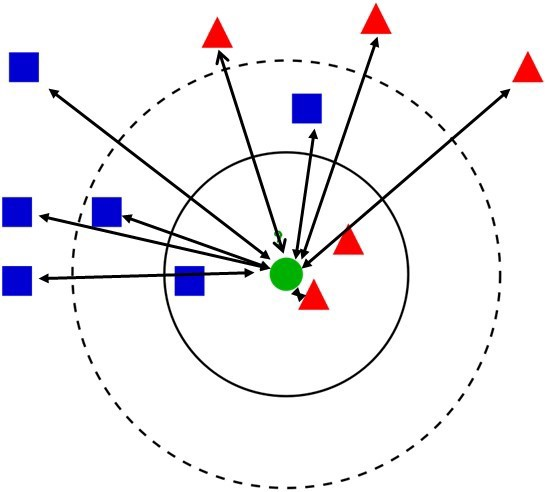

In [783]:
param_grid = {  'n_neighbors': list(range(1,30))}


In [784]:
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [785]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_neighbors': 5}


In [786]:
param_grid={'leaf_size': list(range(1,50))}

In [787]:
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [788]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'leaf_size': 2}


In [789]:
param_grid={'p': [1,2,3,4,5,6,7,8,9,10]}

In [790]:
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [791]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'p': 2}


In [792]:
parameters={'weights':('uniform', 'distance'),'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'weights': ('uniform', 'distance')})

In [793]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'algorithm': 'auto', 'weights': 'distance'}


In [794]:
param_grid={
    'n_jobs':[1,2,3,4,5,6,7,8,9,10,-1,None],
    'metric_params':[dict,None],
    'metric' :['standard Euclidean metric','minkowski','DistanceMetric']
}


In [795]:
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['standard Euclidean metric', 'minkowski',
                                    'DistanceMetric'],
                         'metric_params': [<class 'dict'>, None],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, None]})

In [796]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1}


In [822]:
knr=KNeighborsRegressor(algorithm='auto',weights='distance',n_neighbors=26,leaf_size=1,p=1,metric_params=None,n_jobs=1,metric= 'minkowski')
knr.fit(x_train,y_train)
print('knr score:',knr.score(x_train,y_train))

knr score: 0.9985289071542846


In [823]:
knrpredict=knr.predict(x_test)
print('knr r2_score:',r2_score(y_test,knrpredict))

knr r2_score: 0.38920044275429566


In [824]:
print("Mean squared error of enr:",mean_squared_error(y_test,enrpred))
print('Mean absolute error of enr:',mean_absolute_error(y_test,enrpred))
print('Root Mean squared error of enr:',np.sqrt(mean_squared_error(y_test,enrpred)))

Mean squared error of enr: 21402.053964546925
Mean absolute error of enr: 100.97615723801954
Root Mean squared error of enr: 146.29440852112882


In [825]:
scores = cross_val_score(knr, x_train, y_train, cv=10)
scores

array([0.77527234, 0.62765149, 0.41827989, 0.43037974, 0.47773799,
       0.54995487, 0.47264497, 0.51964781, 0.0293133 , 0.32479606])

In [826]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.46 accuracy with a standard deviation of 0.19


In [827]:
print(scores.mean())
print(scores.std())

0.4625678455708918
0.18599759786211542


# SupportVectorRegressor:
    Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.


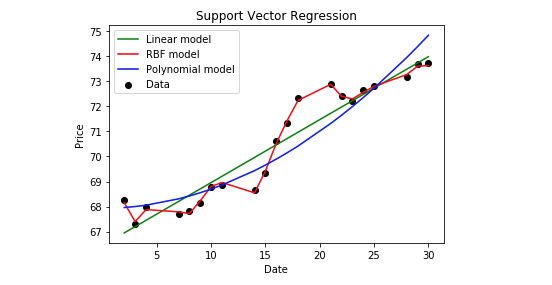

In [ ]:
parameters={'kernel':('linear','rbf','poly')}
svr=SVR()
gds=GridSearchCV(svr,parameters)
gds.fit(x_train,y_train)

In [ ]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

In [127]:
parameters={'C':[1, 10,20,30,40,50,60,70,80,90,100],'gamma':('scale', 'auto'),"epsilon":[0.1,0.2,0.3,0.4,0.5]}
svr=SVR()
gds=GridSearchCV(svr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'gamma': ('scale', 'auto')})

In [128]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'C': 100, 'epsilon': 0.1, 'gamma': 'scale'}


In [129]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000,-1],
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0]}


In [130]:
svr=SVR()
gds=GridSearchCV(svr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000,
                                      -1],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0]})

In [131]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 100, 'tol': 0.1}


In [132]:
param_grid={'cache_size':[100,200,300,400,500,600,700,800,900,1000],
    'shrinking':[bool,True],
    'coef0':[0.0,0.1,0.001,0.0001,1.0,1]}

In [133]:
svr=SVR()
gds=GridSearchCV(svr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'cache_size': [100, 200, 300, 400, 500, 600, 700, 800,
                                        900, 1000],
                         'coef0': [0.0, 0.1, 0.001, 0.0001, 1.0, 1],
                         'shrinking': [<class 'bool'>, True]})

In [134]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'cache_size': 100, 'coef0': 0.0, 'shrinking': True}


In [139]:
svr=SVR(kernel="rbf",C=100,gamma='scale',epsilon=0.1,degree=3,cache_size=100,coef0=0.0,max_iter=100,shrinking=True,tol=0.1)
svr.fit(x_train,y_train)
print('svr score:',svr.score(x_train,y_train))

svr score: 0.376522377838732


In [140]:
svrpredict=svr.predict(x_test)
print('svr r2_score:',r2_score(y_test,svrpredict))

svr r2_score: 0.2477086068813582


In [141]:
print('Mean absolute error of svr:',mean_absolute_error(y_test,svrpredict))
print('Mean squared error of svr:',mean_squared_error(y_test,svrpredict))
print('Root Mean squared error of svr:',np.sqrt(mean_squared_error(y_test,svrpredict)))

Mean absolute error of svr: 70.50841977835819
Mean squared error of svr: 20993.788119068187
Root Mean squared error of svr: 144.89233285121813


In [142]:
scores = cross_val_score(svr, x_train, y_train, cv=5)
scores

array([0.55563565, 0.25147941, 0.44067165, 0.28385794, 0.0883723 ])

In [143]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.32 accuracy with a standard deviation of 0.16


In [144]:
print(scores.mean())
print(scores.std())

0.3240033895763115
0.16103315539833796


# SGDRegressor:
    The class SGDRegressor implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties to fit linear regression models. SGDRegressor is well suited for regression problems with a large number of training samples (> 10.000), for other problems we recommend Ridge, Lasso, or ElasticNet.



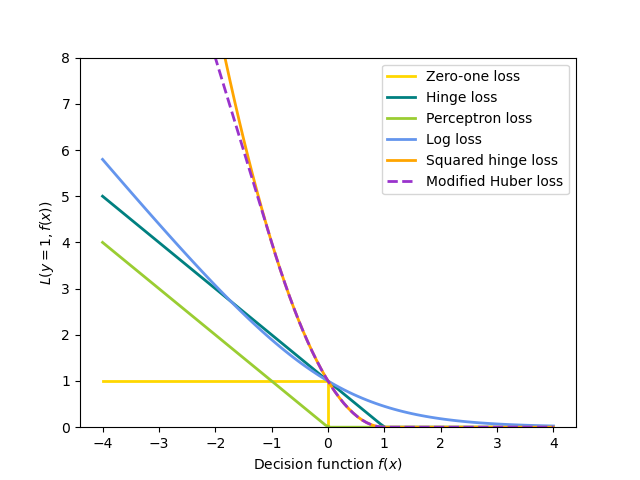

In [147]:
from sklearn.linear_model import SGDRegressor

In [148]:
param_grid={
    'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.005],
    'learning_rate':['constant','optimal','invscaling','adaptive'],
    'max_iter':[100,300,600,1000,1200,1500,2000],
    'penalty':['l2','l1','elasticnet'],
    'epsilon':[0.1,0.2,0.3,0.4,0.5]
}


In [149]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 0.005],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [150]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 0.1, 'epsilon': 0.1, 'learning_rate': 'adaptive', 'max_iter': 1200, 'penalty': 'l2'}


In [151]:
param_grid={
    'random_state': list(range(1,100)),
    'warm_start':[bool,False],
    'power_t':['double',0.25 ],
    'l1_ratio':[0,0.1,0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
}


In [152]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'l1_ratio': [0, 0.1, 0.5, 0.1, 0.15, 0.2, 0.25, 0.3,
                                      0.35, 0.4, 0.45, 0.5],
                         'power_t': ['double', 0.25],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'warm_start': [<class 'bool'>, False]})

In [153]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'l1_ratio': 0, 'power_t': 0.25, 'random_state': 51, 'warm_start': <class 'bool'>}


In [154]:
param_grid={
    'n_iter_no_change':[10,50,100,200,400,500,700,1000],
    'loss':['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'early_stopping':[True,False]
}   
  



In [155]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'early_stopping': [True, False],
                         'loss': ['huber', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'n_iter_no_change': [10, 50, 100, 200, 400, 500, 700,
                                              1000]})

In [156]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'early_stopping': False, 'loss': 'huber', 'n_iter_no_change': 400}


In [157]:
param_grid={
    'eta0':[0.01,0.1,0.001,0.0001,1.0],
    'average':[True,False],
    'shuffle':[False,True],
    'tol':[0.1,0.14,0.18,0.01,0.001,0.0001,0.00001,1.0,1e-3]}   

In [158]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'average': [True, False],
                         'eta0': [0.01, 0.1, 0.001, 0.0001, 1.0],
                         'shuffle': [False, True],
                         'tol': [0.1, 0.14, 0.18, 0.01, 0.001, 0.0001, 1e-05,
                                 1.0, 0.001]})

In [159]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'average': True, 'eta0': 0.0001, 'shuffle': True, 'tol': 0.18}


In [162]:
sgd=SGDRegressor(alpha=0.1,max_iter=1200,learning_rate="adaptive",penalty="l2",shuffle=True,random_state=51,warm_start=True,power_t=0.25,l1_ratio=0,average=True, eta0= 0.0001, tol= 0.18,early_stopping= False, n_iter_no_change=400,loss='huber',epsilon= 0.1)
sgd.fit(x_train,y_train)
print('sgd score:',sgd.score(x_train,y_train))

sgd score: -0.0043004067466101414


In [163]:
sgdpredict=sgd.predict(x_test)
print('sgd r2_score:',r2_score(y_test,sgdpredict))

sgd r2_score: -0.25343217556770004


In [164]:
print("Mean absolue error of sgd:",mean_absolute_error(y_test,sgdpredict))
print("Mean squared error of sgd:",mean_squared_error(y_test,sgdpredict))
print("Root Mean squared error of sgd:",np.sqrt(mean_squared_error(y_test,sgdpredict)))

Mean absolue error of sgd: 95.59098195277356
Mean squared error of sgd: 34978.852285421555
Root Mean squared error of sgd: 187.02634115391754


In [165]:
scores = cross_val_score(sgd, x_train, y_train, cv=5)
scores

array([ 0.0693746 , -0.43710209,  0.16794995, -0.30463469, -0.04417468])

In [166]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


-0.11 accuracy with a standard deviation of 0.23


In [167]:
print(scores.mean())
print(scores.std())

-0.10971738401948335
0.22743897563511542


# Approaching Ensemble Method

# RandomForestRegressor:
    Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity (it can be used for both classification and regression tasks).


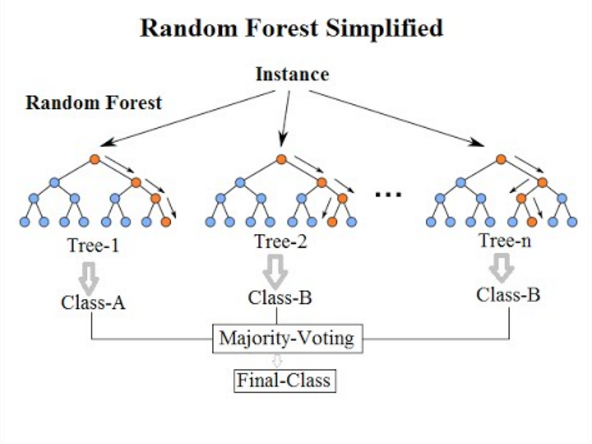

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
param_grid={
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt','log2'],
 'min_samples_leaf': [1, 2, 4]}


In [170]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4]})

In [171]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1}


In [172]:
param_grid={
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [173]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]})

In [174]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_samples_split': 2, 'n_estimators': 800}


In [175]:
param_grid={
    'criterion' :['squared_error', 'mse', 'absolute_error', 'poisson']}

In [176]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson']})

In [177]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'mse'}


In [178]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
    'n_jobs':[1,2,3,4,5,6,7,8,9.10,None]}

In [179]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9.1, None]})

In [180]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_leaf_nodes': 100, 'n_jobs': 8}


In [190]:
param_grid={
    'random_state': list(range(1,100))
}


In [191]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [192]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 33}


In [184]:
param_grid={'warm_start':[True,False],
    'max_samples':[0,1,None]
}

In [185]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_samples': [0, 1, None],
                         'warm_start': [True, False]})

In [186]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_samples': None, 'warm_start': True}


In [187]:
param_grid={
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001],
    'min_impurity_decrease':[0.0,0.1,0.001,0.0001],
    'oob_score':[True,False],
    'ccp_alpha':[0.1,0.001,0.0001,.1,1.0]


}


In [188]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'min_impurity_decrease': [0.0, 0.1, 0.001, 0.0001],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001],
                         'oob_score': [True, False]})

In [189]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'ccp_alpha': 0.1, 'min_impurity_decrease': 0.1, 'min_weight_fraction_leaf': 0.0001, 'oob_score': True}


In [133]:
rfr=RandomForestRegressor(criterion='mse',max_features='sqrt',n_estimators=800,max_leaf_nodes=100,n_jobs=8,min_samples_split=2,bootstrap=True,max_depth=90,min_samples_leaf=1,random_state=33,warm_start=True,max_samples=None,ccp_alpha= 0.1, min_impurity_decrease= 0.1, min_weight_fraction_leaf= 0.0001, oob_score= True)
#RandomForestRegressor(100)by default

In [134]:
rfr.fit(x_train,y_train)
print('rfr score:',rfr.score(x_train,y_train))

rfr score: 0.9623003910692497


In [135]:
perdrfr=rfr.predict(x_test)
print('rfr r2_score:',r2_score(y_test,perdrfr))

rfr r2_score: 0.5402194474626489


In [136]:
print("Mean absolue error of rfr:",mean_absolute_error(y_test,perdrfr))
print("Mean squared error of rfr:",mean_squared_error(y_test,perdrfr))
print("Root Mean squared error of rfr:",np.sqrt(mean_squared_error(y_test,perdrfr)))

Mean absolue error of rfr: 57.136087464140466
Mean squared error of rfr: 12830.846650022713
Root Mean squared error of rfr: 113.27332717821399


In [137]:
scores = cross_val_score(rfr, x_train, y_train, cv=5)
scores

array([0.88918285, 0.73917858, 0.77916273, 0.72733233, 0.56841017])

In [138]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.74 accuracy with a standard deviation of 0.10


In [139]:
print(scores.mean())
print(scores.std())

0.7406533317967156
0.1033356903154416


# AdaBoostRegressor:
       Adaboost stands for Adaptive Boosting and it is widely used ensemble learning algorithm in machine learning. Weak learners are boosted by improving their weights and make them vote in creating a combined final model. In this post, we'll learn how to use AdaBoostRegressor class for the regression problem. AdaboostRegressor starts fitting the regressor with the dataset and adjusts the weights according to error rate. 


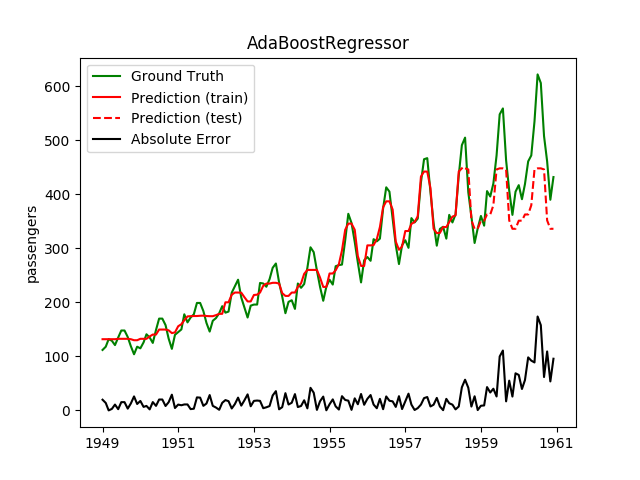

In [242]:
from sklearn.ensemble import AdaBoostRegressor

In [243]:
param_grid={'n_estimators':[50,100,500,1000,1500,2000]}
    


In [244]:
ada=AdaBoostRegressor()
gds=GridSearchCV(ada,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [50, 100, 500, 1000, 1500, 2000]})

In [245]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 500}


In [246]:
param_grid={'learning_rate':[.0001,.001,0.01,.1,1.0],'loss': ['linear', 'square', 'exponential']}
    

In [247]:
ada=AdaBoostRegressor()
gds=GridSearchCV(ada,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential']})

In [248]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'learning_rate': 0.1, 'loss': 'exponential'}


In [249]:
param_grid={
    'random_state': list(range(1,100))}


In [250]:
ada=AdaBoostRegressor()
gds=GridSearchCV(ada,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [251]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 5}


In [252]:
ada=AdaBoostRegressor(loss='exponential',n_estimators=500,random_state=5,learning_rate=0.1)


In [253]:
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(predada)

[163.25632184  78.27253521  81.30285714 104.69470588 175.98038095
 124.62095694 202.11604938 123.955      105.68756098  77.96568182
  81.30285714  82.06830189 174.9453211   78.11129032  80.51027778
  78.27253521 123.          77.96568182  77.96568182  91.01375
  80.8393617  104.69470588  78.11129032  79.09677419 115.16309524
 613.78888889 123.955       78.11129032 123.955       78.27253521
  78.11129032 198.74285714 107.68978495 408.0192      80.51027778
  78.11129032 210.6959596  325.3        124.459      102.70188679
  89.60810811  79.92972973 406.72769841 125.12576923 105.68756098
 455.35099459 178.02470588 184.44467327  79.80769231 105.68756098
 161.85116883  78.27253521  79.92972973 218.66516854  81.30285714
 202.37184466 165.70487805  78.11129032 497.52570253 187.26989474
  78.8151     123.955       78.11129032  89.93822581  79.80769231
 186.72991453 416.90874074  78.11129032  87.78333333  78.11129032
 102.70188679 123.955       78.11129032  77.96568182 105.68756098
 189.35659091

In [254]:
print('ada score:',ada.score(x_train,y_train))
print('ada r2_score:',r2_score(y_test,predada))

ada score: 0.7727813725331357
ada r2_score: 0.3874564132126055


In [255]:
print("Mean absolue error of ada:",mean_absolute_error(y_test,predada))
print("Mean squared error of ada:",mean_squared_error(y_test,predada))
print("Root Mean squared error of ada:",np.sqrt(mean_squared_error(y_test,predada)))

Mean absolue error of ada: 96.69209960292089
Mean squared error of ada: 17093.921839779126
Root Mean squared error of ada: 130.7437258142016


In [256]:
scores = cross_val_score(ada, x_train, y_train, cv=5)
scores

array([0.76795498, 0.48507112, 0.63201938, 0.61711796, 0.51277821])

In [257]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.60 accuracy with a standard deviation of 0.10


In [258]:
print(scores.mean())
print(scores.std())

0.6029883318476795
0.10029833455058429


# GradientBoostRegressor:
    Gradient Boosting algorithm is used to generate an ensemble model by combining the weak learners or weak predictive models. Gradient boosting algorithm can be used to train models for both regression and classification problem. Gradient Boosting Regression algorithm is used to fit the model which predicts the continuous value.



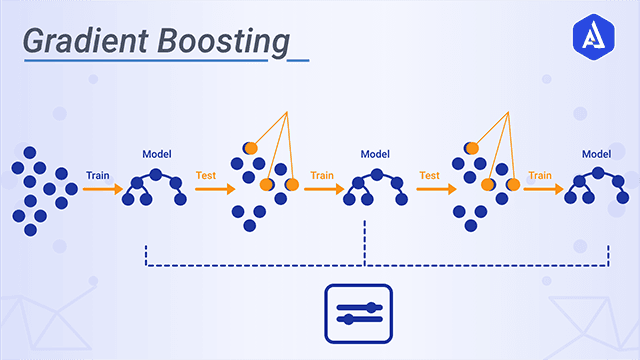

In [261]:
from sklearn.ensemble import GradientBoostingRegressor

In [262]:
param_grid={
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt','log2'],
 'min_samples_leaf': [1, 2, 4]}


In [263]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4]})

In [264]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2}


In [268]:
param_grid={
 'min_samples_split': [2, 5, 10],
  'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
  'init':['estimator','zero',None]}


In [269]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'init': ['estimator', 'zero', None],
                         'min_samples_split': [2, 5, 10],
                         'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                       0.9]})

In [270]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'init': None, 'min_samples_split': 5, 'subsample': 0.6}


In [271]:
param_grid={ 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [272]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]})

In [273]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 400}


In [274]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
    'criterion' :['mse','mae','friedman_mse', 'squared_error'],
    'alpha':[0.1,0.001,0.0001,.1,1.0]}


In [275]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'criterion': ['mse', 'mae', 'friedman_mse',
                                       'squared_error'],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None]})

In [276]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 0.1, 'criterion': 'mae', 'max_leaf_nodes': 80}


In [278]:
param_grid={
    'random_state': list(range(1,100)),
    'warm_start':[True,False]}

In [279]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'warm_start': [True, False]})

In [280]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 17, 'warm_start': True}


In [281]:
param_grid={'ccp_alpha':[0.1,0.001,0.0001,.1,1.0],
    'tol':[0.1,0.14,0.18,0.01,0.001,0.0001,0.00001,1.0,1e-3]}

In [282]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'tol': [0.1, 0.14, 0.18, 0.01, 0.001, 0.0001, 1e-05,
                                 1.0, 0.001]})

In [283]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'ccp_alpha': 1.0, 'tol': 1.0}


In [284]:
param_grid={
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001],
    'n_iter_no_change':[10,50,100,200,500,1000,None]}


In [285]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001],
                         'n_iter_no_change': [10, 50, 100, 200, 500, 1000,
                                              None]})

In [286]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_weight_fraction_leaf': 0.001, 'n_iter_no_change': 200}


In [287]:
param_grid={'loss':['ls', 'lad', 'huber', 'quantile','squared_error','absolute_error'],
    'min_impurity_decrease':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10]}


In [288]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['ls', 'lad', 'huber', 'quantile',
                                  'squared_error', 'absolute_error'],
                         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                   0.6, 0.7, 0.8, 0.9, 0.1]})

In [289]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'loss': 'ls', 'min_impurity_decrease': 0.1}


In [305]:
grid=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',max_features='sqrt',random_state=17,max_depth=90,min_samples_leaf=2,min_samples_split=5,n_estimators=400,subsample=0.6,alpha=0.1,max_leaf_nodes=80,warm_start=True,min_weight_fraction_leaf=0.001,n_iter_no_change=200,init=None,min_impurity_decrease= 0.1,tol= 1.0,ccp_alpha= 1.0 )
grid.fit(x_train,y_train)
predgrid=grid.predict(x_test)
print(predgrid)

[ 1.38363930e+02  1.19878432e+01  4.59950989e+01  1.59675140e+01
  1.18215959e+02  3.73330669e+01  3.99722833e+02  7.84221630e+01
  5.38963919e+01  9.74917769e-01  5.31939186e+01  7.32488203e+01
  1.36437424e+02  8.97450808e+00  7.40302451e+01  4.45692940e+00
  9.54721288e+01  4.63470400e+01  1.68694236e+01  6.46746651e+01
  6.03038020e+01  2.31004387e+01  7.30179162e+01  1.75905675e+01
  2.18872878e+01  5.87737250e+02  4.37014719e+01  1.91674382e+01
  4.99154483e+01  7.39400781e+00  1.61849299e+01  2.46693355e+02
  3.72417187e+01  4.94108438e+02  2.87607408e+00  3.29192329e+01
  1.54274255e+02  4.26694912e+02  1.69107682e+02  2.13791906e+01
  6.94856612e+01  5.10152418e+00  4.21076565e+02  3.62076025e+01
  2.64319969e+01  5.25175215e+02  1.47924181e+02  1.15098545e+02
  2.94543283e+01  2.92643305e+01  7.71401352e+01  4.82464323e+01
  4.12908633e+01  1.29420834e+02  1.41820663e+01  2.46257134e+02
  2.83459278e+01  3.18811272e+01  6.34159971e+02  1.68033764e+02
  1.71486482e+01  1.02210

In [306]:
print('Gradient score:',grid.score(x_train,y_train))
print('Gradient r2_score:',r2_score(y_test,predgrid))

Gradient score: 0.9766300356322825
Gradient r2_score: 0.5054993743167684


In [307]:
print("Mean absolue error of grid:",mean_absolute_error(y_test,predgrid))
print("Mean squared error of grid:",mean_squared_error(y_test,predgrid))
print("Root Mean squared error of grid:",np.sqrt(mean_squared_error(y_test,predgrid)))

Mean absolue error of grid: 62.524182470485734
Mean squared error of grid: 13799.76091086713
Root Mean squared error of grid: 117.47238360937062


In [312]:
scores = cross_val_score(grid, x_train, y_train, cv=17)
scores

array([0.82577749, 0.87883713, 0.93904777, 0.83506476, 0.76133717,
       0.78476609, 0.67055086, 0.60296258, 0.85120488, 0.87046548,
       0.77478296, 0.63069802, 0.67922568, 0.59047815, 0.39855958,
       0.76795543, 0.75968237])

In [314]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.74 accuracy with a standard deviation of 0.13


In [315]:
print(scores.mean())
print(scores.std())

0.7424350815557513
0.13006719234769304


In [316]:
from xgboost.sklearn import XGBRegressor

In [317]:
param_grid={  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [318]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [319]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 400}


In [321]:
param_grid={'max_depth': [3,5,7,9,11,13,15,17,18,19,20,30,50,60,70,80,90,100 ,None],
      'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [322]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [323]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 5, 'subsample': 0.7}


In [324]:
param_grid={'min_child_weight':[1,2,3,4,5,6,7,8,9,10],
    'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10]}

In [325]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [326]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'gamma': 0.7, 'min_child_weight': 2}


In [327]:
param_grid={ 'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.95,0.100],
     'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
      'eta': [.3, .2, .1, .05, .01, .005]}

In [328]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=N

In [329]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'colsample_bytree': 0.5, 'eta': 0.1, 'reg_alpha': 1e-05}


In [333]:
param_grid={'learning_rate':[.0001,.001,0.01,.1,1.0]}


In [334]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [335]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'learning_rate': 0.1}


In [336]:
param_grid={'random_state': list(range(1,100))}


In [337]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [338]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1}


In [339]:
param_grid={'booster':['gbtree','gblinear'],
           'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
           'nthread':[1,2,3,4,5,6,7,8,9,10]}

In [340]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

[02:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [341]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'booster': 'gbtree', 'max_leaf_nodes': 10, 'nthread': 1}


In [345]:
param_grid={ 'n_jobs':[1,2,3,4,5,6,7,8,9.10,None],
           'colsample_bylevel':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,None]}


In [346]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [347]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'colsample_bylevel': 0.5, 'n_jobs': 1}


In [348]:
param_grid={  'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.005],
           'lambda':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,None]}


In [349]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [350]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 0.0001, 'lambda': 0.1}


In [358]:
xg = XGBRegressor(n_estimators= 400,max_depth= 5, subsample= 0.7,gamma= 0.7, min_child_weight= 2,colsample_bytree= 0.5, eta= 0.1,reg_alpha= 1e-05,learning_rate= 0.1, random_state= 1,booster='gbtree',nthread=1,colsample_bylevel=0.5,n_jobs=1,reg_lambda=1,alpha=0.0001)
xg.fit(x_train,y_train)
predxg=xg.predict(x_test)
print(predxg)

[120.92793    16.597843   46.620525   15.492952  114.48385    41.959915
 439.54202    91.85907    40.838      24.687304   57.74484    59.995747
 112.14713    12.843499   47.72925    -7.403604  103.88437    40.64666
  29.409342   42.548534   59.186726   29.639677   70.43553    66.05996
  39.63433   583.22986    41.608494   25.091053   46.82501    10.615184
  31.21266   298.1113     42.18026   442.75912     1.0684253  38.657433
 290.65775   442.05045   119.033966   26.35443    67.16246     1.460184
 352.63467    43.435432   37.981934  560.43396   174.60614   136.70644
  31.96223    24.990538   82.76535    45.088837   44.097195  103.3077
  20.403116  363.08646    29.484283   39.994328  604.3145    130.46796
  34.306774  106.78022    15.139559    1.560491  -11.465127  127.79452
 432.98404    21.072561   30.925444   32.878605   12.042249   46.274902
  27.720984   42.558327   25.159506  186.80734    42.211403   35.871826
  33.663876  374.308      32.878605   39.42937    24.881618   18.918947

In [359]:
print('xgboost score:',xg.score(x_train,y_train))
print('xgboost r2_score:',r2_score(y_test,predxg))

xgboost score: 0.9950421331049252
xgboost r2_score: 0.5474675856841129


In [360]:
print("Mean absolue error of xg:",mean_absolute_error(y_test,predxg))
print("Mean squared error of xg:",mean_squared_error(y_test,predxg))
print("Root Mean squared error of xg:",np.sqrt(mean_squared_error(y_test,predxg)))

Mean absolue error of xg: 59.67915226969511
Mean squared error of xg: 12628.576785617744
Root Mean squared error of xg: 112.37694063115326


In [361]:
scores = cross_val_score(xg, x_train, y_train, cv=5)
scores

array([0.86184226, 0.75272962, 0.75697974, 0.73858886, 0.60073637])

In [362]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.74 accuracy with a standard deviation of 0.08


In [363]:
print(scores.mean())
print(scores.std())

0.7421753676376566
0.08326893806194399


# Conclusion

In [143]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rfr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

original   predicted
0       50.00  131.461366
1        4.50   16.118493
2       14.85   42.790146
3       31.50   20.629041
4       32.00  104.270340
..        ...         ...
110     50.00   31.611851
111    351.43  317.059655
112    600.00   45.412399
113    600.00  444.053986
114      6.30   32.486715

[115 rows x 2 columns]

# Model Saving 

In [144]:
import pickle
filename="global_power_plant .pkl"
pickle.dump(rfr,open(filename,'wb'))

# Task 2 prediction of primary fuel classification problems

# Machine learning models


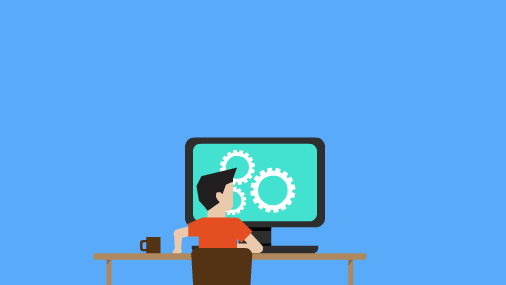

In the previuos seciton we have made X as the features and y as Primary_fuel   - the target value we want to predict.



# Assumptions:
    .This is a classifications problem 
    .Train test split will be a 75:25 ratio respectively



# Models we will use:
    .Logistic Regression
    .Decision Tree Classifier
    .Random Forest Regressor
    .Support Vector Machines
    .GaussianNB
    .KNeighborsClassifier
    .AdaBoostClassifier
    .GradientBoostingClassifier
    .XGBClassifier

# The Process of Modeling the Data:
    .Importing the model

    .Fitting the model

    .Predicting Item Outlet Sales

    .Classification metrics




# Score Metrics for Classification:
    .Accuracy - Accuracy is the quintessential classification metric. It is pretty easy to understand. And easily suited for binary as well as a multiclass classification problem.



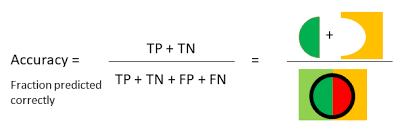

# key:
    .TP - True Positive
    .TN - True Negitive
    .TP - True Positive
    .TN - True Negitive



.Precision - Answers the following question: what proportion of predicted Positives is truly Positive?

.Precision = (TP)/(TP+FP)

.Recall - Answers the following question: what proportion of actual Positives is correctly classified?

.Recall = (TP)/(TP+FN)

.f1 score - A number between 0 and 1, the harmonic mean of precision and recall.



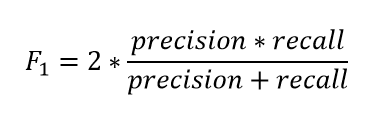

# Logistic Regression:
    Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model.




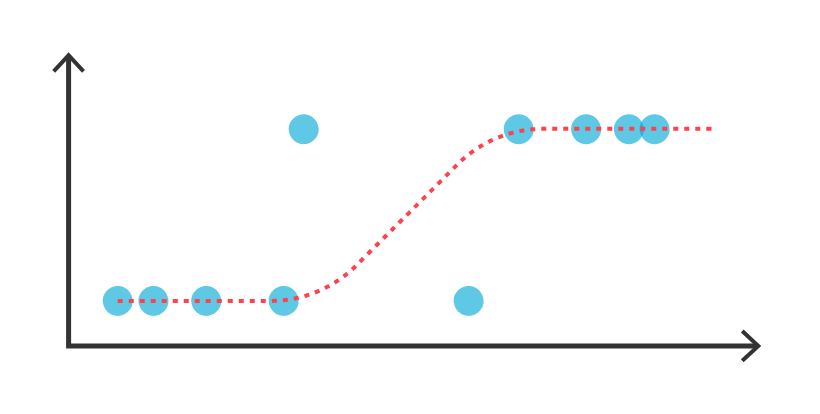

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [273]:
train_x,test_x,train_y,test_y=train_test_split(train_x,train_y,test_size=.30,random_state=0)

In [274]:
train_x.shape

(319, 9)

In [275]:
train_y.shape

(319,)

In [276]:
test_x.shape

(138, 9)

In [277]:
test_y.shape

(138,)

In [279]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm


In [280]:
lgr = LogisticRegression()
parameters = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
gds=GridSearchCV(lgr,parameters)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']})

In [281]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'C': 0.09, 'penalty': 'l2'}


In [284]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000,5000,10000,15000,20000]}



In [285]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000,
                                      5000, 10000, 15000, 20000]})

In [286]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 15000}


In [287]:
param_grid={'random_state': list(range(1,100))}

In [288]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [289]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1}


In [290]:
param_grid={'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0],
    'warm_start':[True,False],
    'dual':[True,False]}

In [291]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'dual': [True, False],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0],
                         'warm_start': [True, False]})

In [292]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'dual': False, 'tol': 0.1, 'warm_start': True}


In [293]:
param_grid={    
    'fit_intercept':[False,True],
    'class_weight':[dict,'balanced',None]}


In [294]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': [<class 'dict'>, 'balanced', None],
                         'fit_intercept': [False, True]})

In [295]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'class_weight': 'balanced', 'fit_intercept': False}


In [296]:
param_grid={ 
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'n_jobs':[0,1,2,3,4,5,6,7,8,9,10,-1,None]
}


In [297]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [298]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'multi_class': 'auto', 'n_jobs': 1, 'solver': 'newton-cg'}


In [444]:
lgr=LogisticRegression(C=0.09,penalty='l2',dual=False,max_iter=15000,random_state=1,tol=0.1,warm_start=True,class_weight='balanced' ,fit_intercept=True,solver='newton-cg',multi_class='auto',n_jobs=1)
lgr.fit(train_x,train_y)
lgr.score(train_x,train_y)
pred=lgr.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8115942028985508
[[13  1  0  0  0  0  0]
 [ 5 22  2  0  2  0  0]
 [ 2  0 13  2  0  0  0]
 [ 0  2  5 21  1  1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  3]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.65      0.93      0.76        14
           1       0.88      0.71      0.79        31
           2       0.65      0.76      0.70        17
           3       0.91      0.70      0.79        30
           4       0.00      0.00      0.00         0
           5       0.83      0.62      0.71         8
           7       0.93      1.00      0.96        38

    accuracy                           0.81       138
   macro avg       0.69      0.68      0.67       138
weighted avg       0.85      0.81      0.82       138



# GaussianNB:
    It's  assumed that all the features are following a gaussian distribution i.e, normal distribution

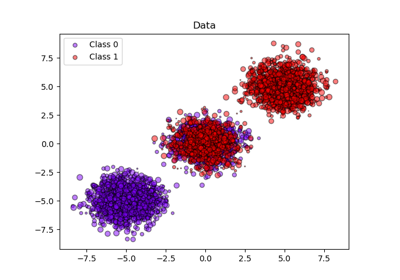

In [299]:
from sklearn.naive_bayes import GaussianNB
param_grid={
    'var_smoothing': [1e-9,0.10,0.20,0.30,0.40,0.50]}


In [300]:
gnb=GaussianNB()
gds=GridSearchCV(gnb,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.2, 0.3, 0.4, 0.5]})

In [301]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'var_smoothing': 1e-09}


In [302]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB(var_smoothing=1e-09)
gnb.fit(train_x,train_y)
gnb.score(train_x,train_y)
predgnb=gnb.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

1.0
[[14  0  0  0  0  0]
 [ 0 31  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        30
           5       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        38

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



# Support Vector Machines:
    In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.




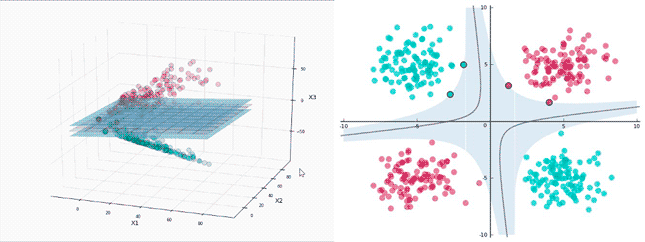

In [303]:
from sklearn.svm import SVC
parameters={'kernel':('linear','rbf','poly')}
svc=SVC()
gds=GridSearchCV(svc,parameters)
gds.fit(train_x,train_y)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ('linear', 'rbf', 'poly')})

In [304]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'kernel': 'linear'}


In [305]:
param_grid={'C':[1, 10,20,30,40,50,60,70,80,90,100],'gamma':('scale', 'auto')}
svc=SVC()
gds=GridSearchCV(svc,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'gamma': ('scale', 'auto')})

In [306]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'C': 10, 'gamma': 'auto'}


In [307]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000,-1],
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0]}


In [308]:
svc=SVC()
gds=GridSearchCV(svc,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=SVC(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000,
                                      -1],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0]})

In [309]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 100, 'tol': 0.1}


In [311]:
param_grid={'cache_size':[100,200,300,400,500,600,700,800,900,1000],
    'shrinking':[False,True],
    'coef0':[0.0,0.1,0.001,0.0001,1.0,1,1e-3]}

In [312]:
svc=SVC()
gds=GridSearchCV(svc,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=SVC(),
             param_grid={'cache_size': [100, 200, 300, 400, 500, 600, 700, 800,
                                        900, 1000],
                         'coef0': [0.0, 0.1, 0.001, 0.0001, 1.0, 1, 0.001],
                         'shrinking': [False, True]})

In [313]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'cache_size': 100, 'coef0': 0.0, 'shrinking': False}


In [315]:
param_grid={
    'random_state': list(range(1,100)),
    'class_weight':['balanced',dict,None],
    'decision_function_shape':['ovo','ovr'],
    'break_ties':[True,False],
}



In [316]:
svc=SVC()
gds=GridSearchCV(svc,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=SVC(),
             param_grid={'break_ties': [True, False],
                         'class_weight': ['balanced', <class 'dict'>, None],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [317]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'break_ties': False, 'class_weight': None, 'decision_function_shape': 'ovo', 'random_state': 1}


In [453]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=10,gamma='auto',cache_size=100,coef0=0.0,tol=0.1,max_iter=100,shrinking =False,break_ties=False,class_weight='balanced',decision_function_shape='ovo',random_state=1,verbose=False)
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.7971014492753623
[[13  1  0  0  0  0]
 [ 0 23  0  8  0  0]
 [ 0  2  3 12  0  0]
 [ 0  0  1 29  0  0]
 [ 0  0  0  4  4  0]
 [ 0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      0.74      0.81        31
           2       0.75      0.18      0.29        17
           3       0.55      0.97      0.70        30
           5       1.00      0.50      0.67         8
           7       1.00      1.00      1.00        38

    accuracy                           0.80       138
   macro avg       0.86      0.72      0.74       138
weighted avg       0.84      0.80      0.78       138



# KNeighborsClassifier:
    By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points. knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') knn.fit(X_train, y_train)


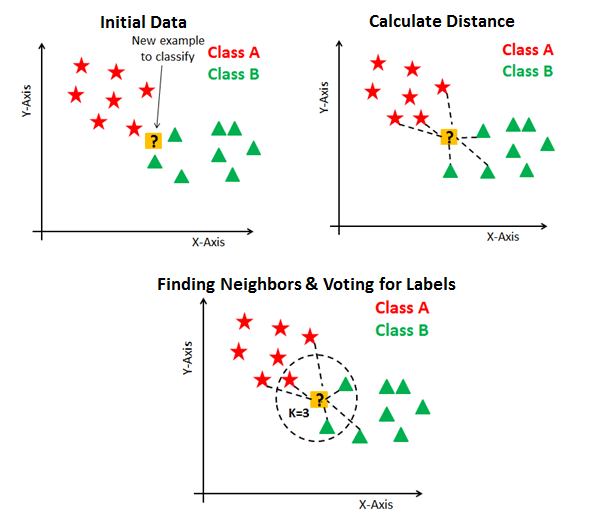

In [319]:
from sklearn.neighbors import KNeighborsClassifier

In [320]:
param_grid = {  'n_neighbors': list(range(1,30)),
                'leaf_size': list(range(1,50)),  
                'p': [1,2,3]}


In [321]:
knn=KNeighborsClassifier()
gds=GridSearchCV(knn,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2, 3]})

In [322]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


In [455]:
parameters={'weights':('uniform', 'distance'),'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}
knn=KNeighborsClassifier()
gds=GridSearchCV(knn,parameters)
gds.fit(train_x,train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'weights': ('uniform', 'distance')})

In [456]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'algorithm': 'auto', 'weights': 'distance'}


In [327]:
param_grid={
    'n_jobs':[1,2,3,4,5,6,7,8,9,10,-1,None],
    'metric_params':[dict,None],
    'metric' :[str , callable,'minkowski']

}


In [328]:
knn=KNeighborsClassifier()
gds=GridSearchCV(knn,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': [<class 'str'>, <built-in function callable>,
                                    'minkowski'],
                         'metric_params': [<class 'dict'>, None],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, None]})

In [329]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1}


In [461]:
knn=KNeighborsClassifier(n_neighbors=1,leaf_size=1,p=1,algorithm='auto',weights='distance',metric='minkowski',metric_params=None,n_jobs=1) 
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn=knn.predict(test_x)
print(accuracy_score(test_y,predknn))
print(confusion_matrix(test_y,predknn))
print(classification_report(test_y,predknn))

0.782608695652174
[[13  1  0  0  0  0]
 [ 3 25  2  1  0  0]
 [ 1  5  5  5  1  0]
 [ 0  3  4 23  0  0]
 [ 0  0  1  2  4  1]
 [ 0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.74      0.81      0.77        31
           2       0.42      0.29      0.34        17
           3       0.74      0.77      0.75        30
           5       0.80      0.50      0.62         8
           7       0.97      1.00      0.99        38

    accuracy                           0.78       138
   macro avg       0.74      0.72      0.72       138
weighted avg       0.77      0.78      0.77       138



# Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label.
A decision tree classifier. Parameters criterion{“gini”, “entropy”}, default=”gini” The function to measure the quality of a split.



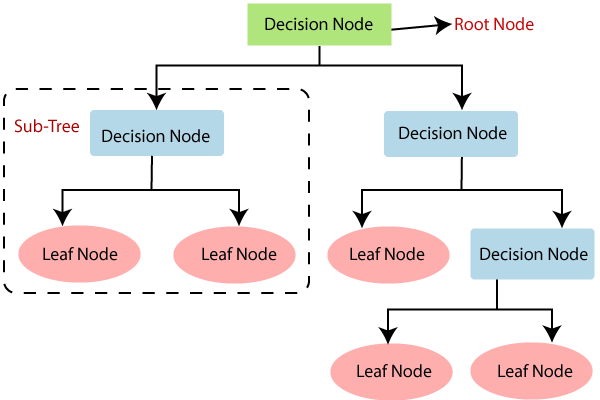

In [330]:
from sklearn.tree import DecisionTreeClassifier

In [331]:
param_grid = {'max_depth': [3, 5, 10,20,30,40,50,60,70,80,90,100,None],
               'min_samples_split': [2, 5, 10],  
                 'min_samples_leaf': [1,2,3]}


In [332]:
dtc=DecisionTreeClassifier()
gds=GridSearchCV(dtc,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]})

In [333]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [334]:
parameters={'criterion':('gini','entropy'),'splitter':('best', 'random'),'max_features': ('auto', 'sqrt', 'log2',None)} 
dtc=DecisionTreeClassifier()
gds=GridSearchCV(dtc,parameters)
gds.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2', None),
                         'splitter': ('best', 'random')})

In [335]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'gini', 'max_features': None, 'splitter': 'random'}


In [339]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001]}

In [340]:
dtc=DecisionTreeClassifier()
gds=GridSearchCV(dtc,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001]})

In [341]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_leaf_nodes': 40, 'min_weight_fraction_leaf': 0.0}


In [342]:
param_grid={'random_state':list(range(0,50)),
    'min_impurity_decrease':[0.0,0.1,0.001,0.0001],
    'class_weight':[dict, 'list of dict' , 'balanced',None]}

In [343]:
dtc=DecisionTreeClassifier()
gds=GridSearchCV(dtc,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [<class 'dict'>, 'list of dict',
                                          'balanced', None],
                         'min_impurity_decrease': [0.0, 0.1, 0.001, 0.0001],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [344]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'class_weight': 'balanced', 'min_impurity_decrease': 0.0, 'random_state': 12}


In [462]:
dtc=DecisionTreeClassifier(max_depth=20,min_samples_leaf=1,min_samples_split=10,criterion='gini',max_features=None,splitter="random",class_weight='balanced',max_leaf_nodes=40,min_impurity_decrease=0.0,min_weight_fraction_leaf=0.0,random_state=12)
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

1.0
[[14  0  0  0  0  0]
 [ 0 31  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        30
           5       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        38

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



# Ensemble method:
Ensemble method is a machine learning paradigm where multiple model(often called as week learner) are trained to solve the same 
problems and combined to get better result.The main hypothesis is that when week model are correctly combined we can obtain
more accurate and/or robest model

Bagging that often consider is a homogenous week learner,learn them independently from each other in parallel and combine them 
following some kind of determinstic averageing process

Boosting that often considering homogeneous week learner,learns them sequentially  in avery adaptive way (a base model depends
 on previous ones) and combines them following a determinstic strategy 
1] Bagging---> Random Forest classifier

2] Boosting---> Ada Boost classifier\ Gradient boosting\ Voting classifier\\ XGBoost

Note--->
Bagging and boosting work with homogenous(same) models---- generally  DecisionTree

# RandomForestClassifier:
    The random forest classifier divides this dataset into subsets. These subsets are given to every decision tree in the random forest system. Each decision tree produces its specific output. For example, the prediction for trees 1 and 2 is apple.


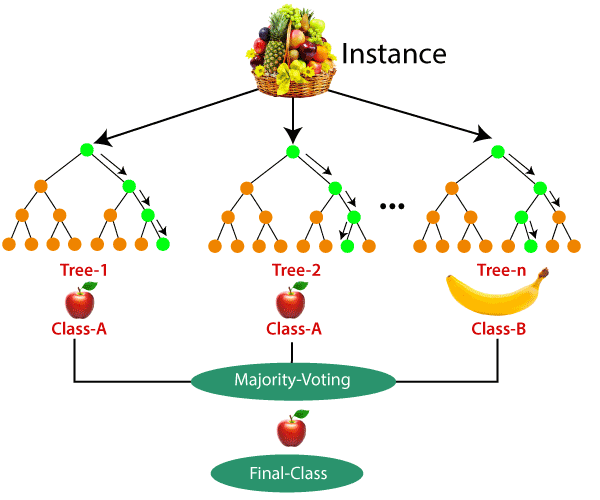

In [345]:
from sklearn.ensemble import RandomForestClassifier

In [349]:
param_grid={
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt','log2'],
 'min_samples_leaf': [1, 2, 4]}


In [350]:
rf=RandomForestClassifier()
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4]})

In [351]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 1}


In [352]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
    'criterion' :['gini','entropy'],
    'n_jobs':[1,2,3,4,5,6,7,8,9.10,None]}
    
rf=RandomForestClassifier()  
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9.1, None]})

In [353]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'entropy', 'max_leaf_nodes': 50, 'n_jobs': 7}


In [354]:
param_grid={
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [355]:
rf=RandomForestClassifier()  
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]})

In [356]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_samples_split': 2, 'n_estimators': 1000}


In [358]:
param_grid={
    'random_state': list(range(1,50)),
    'warm_start':[True,False],
    'max_samples':[0,1,None]
}


In [359]:
rf=RandomForestClassifier()  
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_samples': [0, 1, None],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'warm_start': [True, False]})

In [360]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_samples': None, 'random_state': 8, 'warm_start': True}


In [361]:
param_grid={
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001],
    'min_impurity_decrease':[0.0,0.1,0.001,0.0001],
    'class_weight':[dict, 'list of dicts' , 'balanced','balanced_subsample',None],
    'oob_score':[True,False]
}

In [362]:
rf=RandomForestClassifier()  
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [<class 'dict'>, 'list of dicts',
                                          'balanced', 'balanced_subsample',
                                          None],
                         'min_impurity_decrease': [0.0, 0.1, 0.001, 0.0001],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001],
                         'oob_score': [True, False]})

In [363]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'class_weight': 'balanced', 'min_impurity_decrease': 0.001, 'min_weight_fraction_leaf': 0.0001, 'oob_score': False}


In [469]:
rf=RandomForestClassifier(n_estimators=1000,random_state=8,bootstrap=True,max_depth=80,max_features='log2',min_samples_leaf=1,criterion='entropy',max_leaf_nodes=50,n_jobs=7,min_samples_split=2,max_samples=None,warm_start=True,class_weight='balanced',min_impurity_decrease=0.001,min_weight_fraction_leaf=0.0001,oob_score=False)
#RandomForestClassifier(100)--> default
rf.fit(train_x,train_y)
predrf=rf.predict(test_x)
print(accuracy_score(test_y,predrf))
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

0.9927536231884058
[[14  0  0  0  0  0]
 [ 0 31  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  0  0  1  7  0]
 [ 0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        17
           3       0.97      1.00      0.98        30
           5       1.00      0.88      0.93         8
           7       1.00      1.00      1.00        38

    accuracy                           0.99       138
   macro avg       0.99      0.98      0.99       138
weighted avg       0.99      0.99      0.99       138



# AdaBoostClassifier:
    AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.


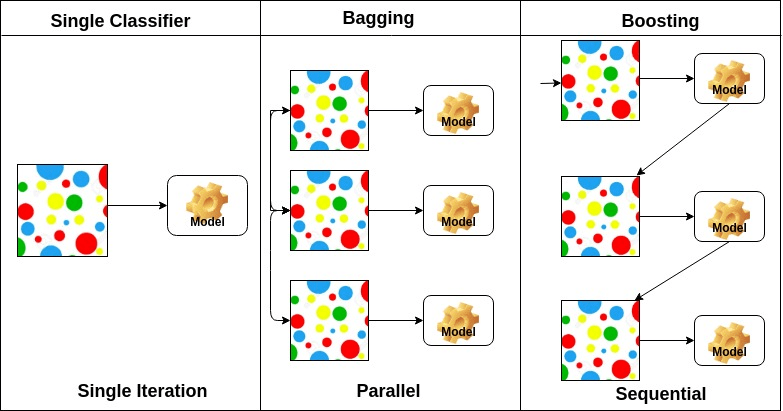

In [364]:
from sklearn.ensemble import AdaBoostClassifier

In [365]:
param_grid={'n_estimators':[50,100,500,1000,1500,2000],'learning_rate':[.0001,.001,0.01,.1,1.0],'algorithm': ["SAMME","SAMME.R"]}
    


In [366]:
ad=AdaBoostClassifier() 
gds=GridSearchCV(ad,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 500, 1000, 1500, 2000]})

In [367]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 500}


In [369]:
param_grid={
    'random_state': list(range(1,100))}


In [370]:
ad=AdaBoostClassifier() 
gds=GridSearchCV(ad,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [371]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1}


In [474]:
#AdaBoostClassifier(base_estimators=DecisionTreeClassifier(),n_estimators=50,lerning_rate=1.0) by default
ad=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.001,n_estimators=500,random_state=1)
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.8985507246376812
[[ 0 14  0  0  0  0]
 [ 0 31  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.69      1.00      0.82        31
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        30
           5       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        38

    accuracy                           0.90       138
   macro avg       0.78      0.83      0.80       138
weighted avg       0.83      0.90      0.86       138



# GradientBoosting:
    The Gradient Boosting Machine is a powerful ensemble machine learning algorithm that uses decision trees. Boosting is a general ensemble technique that involves sequentially adding models to the ensemble where subsequent models correct the performance of prior models. AdaBoost was the first algorithm to deliver on the promise of boosting..



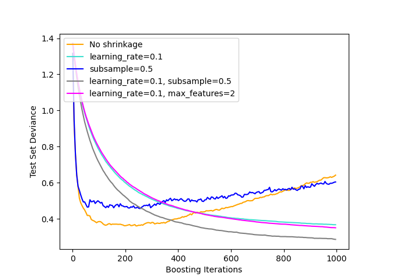

In [372]:
  from sklearn .ensemble import GradientBoostingClassifier

In [375]:
param_grid={
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,150,200,300,400,500, None]}


In [376]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       150, 200, 300, 400, 500, None]})

In [377]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 20}


In [378]:
param_grid={'max_features': ['auto', 'sqrt','log2'],
 'min_samples_leaf': [1, 2, 4]}

In [379]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4]})

In [380]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_features': 'auto', 'min_samples_leaf': 1}


In [381]:
param_grid={
 'min_samples_split': [2, 5, 10],
  'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [382]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_split': [2, 5, 10],
                         'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                       0.9]})

In [383]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_samples_split': 2, 'subsample': 0.6}


In [384]:
param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [385]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]})

In [386]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 200}


In [387]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None]}

In [388]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None]})

In [389]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_leaf_nodes': 10}


In [390]:
 param_grid={
   'criterion' :['mse','mae','friedman_mse', 'squared_error']}


In [391]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse',
                                       'squared_error']})

In [392]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'friedman_mse'}


In [393]:
param_grid={
    'random_state': list(range(1,100))}

In [394]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [395]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1}


In [396]:
param_grid={
    'warm_start':[True,False],
    'tol':[1e-4,0.1,0.01,0.001,0.0001],
    'init':['estimator','zero',None],
    'ccp_alpha':[0.1,0.001,0.0001,.1,1.0]}



In [397]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'init': ['estimator', 'zero', None],
                         'tol': [0.0001, 0.1, 0.01, 0.001, 0.0001],
                         'warm_start': [True, False]})

In [398]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'ccp_alpha': 0.001, 'init': 'zero', 'tol': 0.0001, 'warm_start': True}


In [399]:
param_grid={
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001]
}


In [400]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001]})

In [401]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_weight_fraction_leaf': 0.0}


In [402]:
param_grid={'n_iter_no_change':[10,50,100,200,400,500,700,1000,None],
    'loss':['deviance', 'exponential']}

In [403]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['deviance', 'exponential'],
                         'n_iter_no_change': [10, 50, 100, 200, 400, 500, 700,
                                              1000, None]})

In [404]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'loss': 'deviance', 'n_iter_no_change': None}


In [405]:
param_grid={    
    'validation_fraction':[0,0.1,0.001,0.0001,1.0]}


In [406]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'validation_fraction': [0, 0.1, 0.001, 0.0001, 1.0]})

In [407]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'validation_fraction': 0}


In [408]:
param_grid={ 'min_impurity_decrease':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10],
    'learning_rate':[0.00001,0.0001,0.001,0.01,0.1,.1,1.0,1]}


In [409]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.1,
                                           1.0, 1],
                         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                   0.6, 0.7, 0.8, 0.9, 0.1]})

In [410]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'learning_rate': 0.1, 'min_impurity_decrease': 0.0}


In [475]:
gb=GradientBoostingClassifier(max_depth= 20, max_features= 'auto', min_samples_leaf= 1,min_samples_split= 2, n_estimators= 200, subsample= 0.6,init='zero', random_state=1, tol= 0.0001, warm_start=True,loss='deviance', min_weight_fraction_leaf= 0.0, n_iter_no_change=None,ccp_alpha=0.001, criterion='friedman_mse',max_leaf_nodes=10,learning_rate=0.1, min_impurity_decrease= 0.0)
gb.fit(train_x,train_y)
gb_pred=gb.predict(test_x)
print(accuracy_score(test_y,gb_pred))
print(confusion_matrix(test_y,gb_pred))
print(classification_report(test_y,gb_pred))

1.0
[[14  0  0  0  0  0]
 [ 0 31  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        30
           5       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        38

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [411]:
from xgboost.sklearn import XGBClassifier

In [412]:
param_grid={  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [413]:
import warnings
warnings.filterwarnings('ignore')
xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [414]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 200}


In [415]:
param_grid={'max_depth': [3,5,7,9,11,13,15,17,18,19,20,30,50,60,70,80,90,100 ,None]}

In [416]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [417]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 3}


In [418]:
param_grid={'min_child_weight':[1,2,3,4,5,6,7,8,9,10]}

In [419]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:22:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [420]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_child_weight': 1}


In [421]:
 param_grid={ 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10],
    'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [422]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [423]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'gamma': 0.1, 'subsample': 0.2}


In [424]:
param_grid={ 'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.95,0.100]}

In [425]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [426]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'colsample_bytree': 0.6}


In [427]:
param_grid={'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
      'eta': [.3, .2, .1, .05, .01, .005]}

In [428]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [429]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'eta': 0.3, 'reg_alpha': 1e-05}


In [430]:
param_grid={'learning_rate':[.0001,.001,0.01,.1,1.0],
        'random_state': list(range(1,100))}


In [431]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...obs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                         

In [432]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'learning_rate': 0.1, 'random_state': 1}


In [433]:
param_grid={'booster':['gbtree','gblinear'],
           'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
           'nthread':[1,2,3,4,5,6,7,8,9,10]}

In [434]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistaken

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [435]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'booster': 'gbtree', 'max_leaf_nodes': 10, 'nthread': 1}


In [436]:
param_grid={ 'n_jobs':[1,2,3,4,5,6,7,8,9.10,None],
           'colsample_bylevel':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,None]}


In [437]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [438]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'colsample_bylevel': 0.6, 'n_jobs': 1}


In [439]:
param_grid={  'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.005],
           'lambda':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,None]}


In [440]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[17:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [441]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 0.1, 'lambda': 0.1}


In [476]:
xg = XGBClassifier(objective='multi:softmax',n_estimators= 200,max_depth= 3, subsample= 0.2,gamma= 0.1, min_child_weight= 1,colsample_bytree= 0.6, eta= 0.3,reg_alpha= 1e-05,learning_rate= 0.1, random_state= 1,booster='gbtree',nthread=1,colsample_bylevel=0.6,n_jobs=1,reg_lambda=0.1,alpha=0.1)
xg.fit(train_x,train_y)
xg_pred=xg.predict(test_x)
print(accuracy_score(test_y,xg_pred))
print(confusion_matrix(test_y,xg_pred))
print(classification_report(test_y,xg_pred))

[22:24:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[14  0  0  0  0  0]
 [ 0 31  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        30
           5       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        38

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



# cross validation 

For improving the valdition of our score methods we nee to use the cross validation method

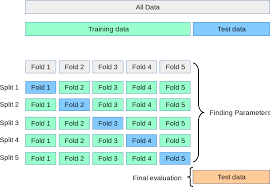

In [477]:
from sklearn.model_selection import cross_val_score

In [490]:
score=cross_val_score(lgr,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.80434783 0.73913043 0.73913043 0.69565217 0.75555556 0.66666667
 0.73333333]
0.7334023464458247
0.0404764111057442


In [491]:
from sklearn.model_selection import KFold

In [480]:
kfold=KFold(5)

In [481]:
score=cross_val_score(lgr,train_x,train_y,cv=kfold)
print(score)
print(score.mean())
print(score.std())

[0.8125     0.8125     0.625      0.65625    0.63492063]
0.708234126984127
0.08572967050348397


In [482]:
score=cross_val_score(gnb,train_x,train_y,cv=5)
print(score)
print(score.mean())
print(score.std())

[1.       1.       0.984375 0.984375 1.      ]
0.99375
0.007654655446197431


In [483]:
score=cross_val_score(svc,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.69565217 0.84782609 0.80434783 0.82608696 0.68888889 0.75555556
 0.75555556]
0.7677018633540372
0.05715810800575561


In [484]:
score=cross_val_score(knn,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.82608696 0.7826087  0.84782609 0.82608696 0.77777778 0.73333333
 0.88888889]
0.8118012422360249
0.0475326528463357


In [485]:
score=cross_val_score(dtc,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[1. 1. 1. 1. 1. 1. 1.]
1.0
0.0


In [486]:
score=cross_val_score(rf,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.97826087 1.         0.97826087 0.91304348 1.         1.
 1.        ]
0.9813664596273293
0.029462214225171254


In [487]:
score=cross_val_score(ad,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.89130435 0.89130435 0.86956522 0.84782609 0.88888889 0.88888889
 0.88888889]
0.8809523809523812
0.015261107237747385


In [488]:
score=cross_val_score(gb,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[1.         1.         0.97826087 0.97826087 1.         1.
 1.        ]
0.9937888198757764
0.009820738075057072


In [489]:
score=cross_val_score(xg,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[22:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [494]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [495]:
y_pred_prob=dtc.predict_proba(test_x)[:,1]
y_pred_prob

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0.])

In [496]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob,pos_label=True)

In [497]:
fpr

array([0., 0., 1.])

In [498]:
tpr

array([0., 1., 1.])

In [499]:
thresholds

array([2., 1., 0.])

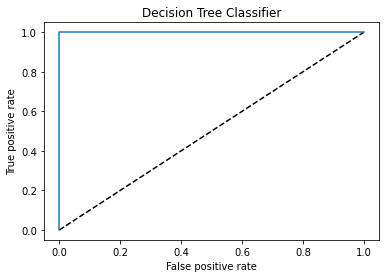

In [500]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

# Conclusions

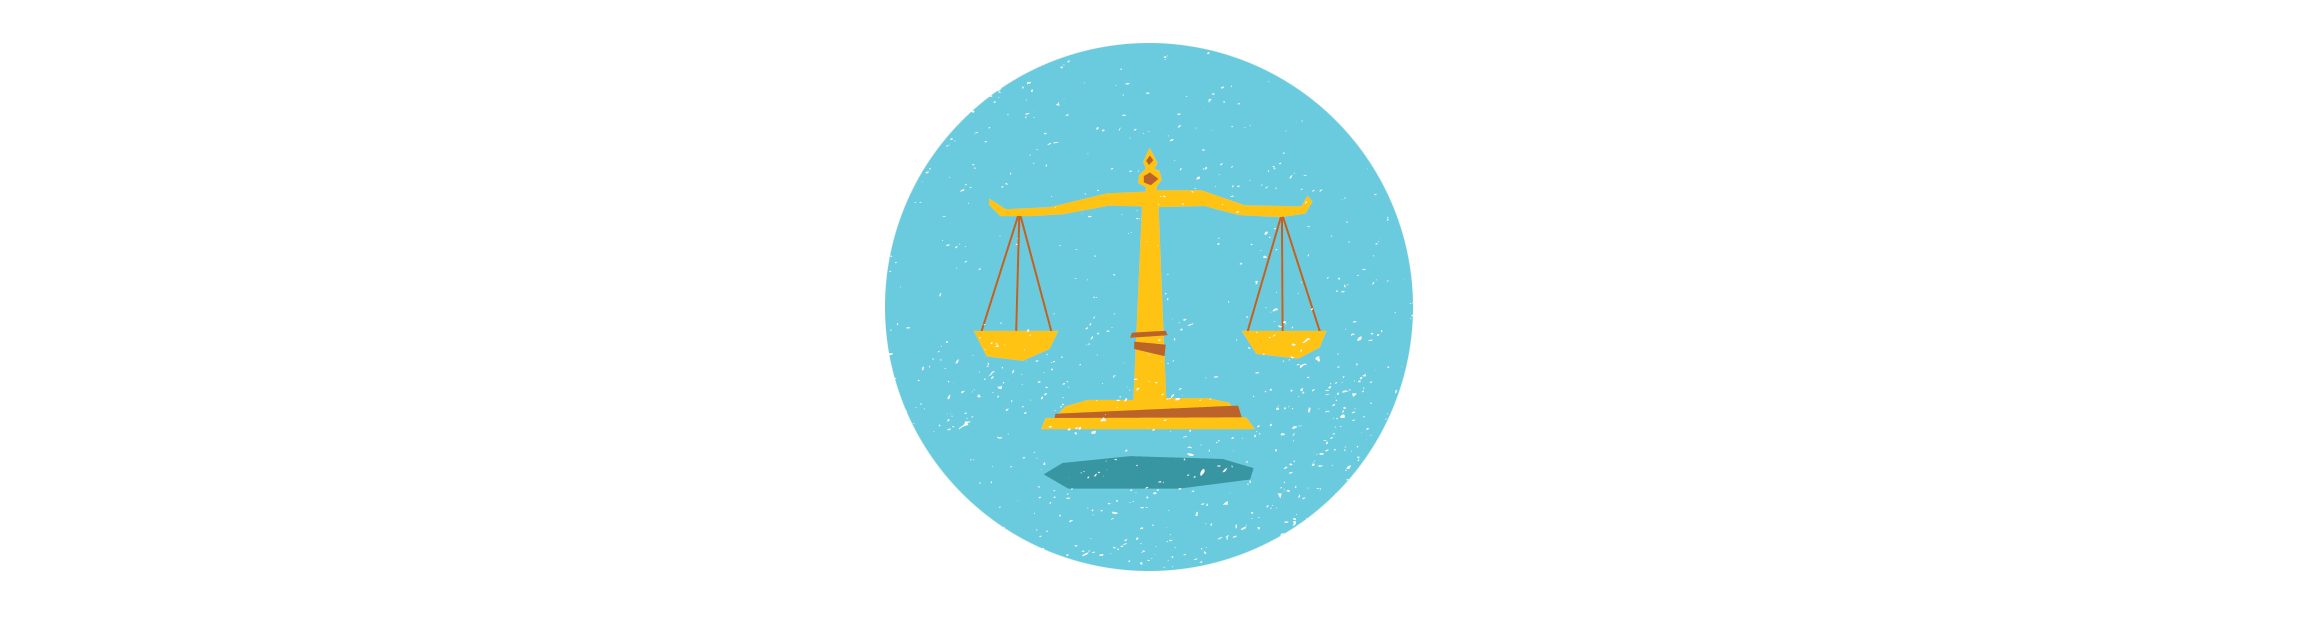

In [501]:
import numpy as np
a=np.array(test_y)
predicted=np.array(dtc.predict(test_x))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

original  predicted
0           3          3
1           3          3
2           7          7
3           0          0
4           3          3
..        ...        ...
133         1          1
134         0          0
135         3          3
136         1          1
137         3          3

[138 rows x 2 columns]

# Model saving

In [502]:
import pickle
filename=" globalpower_plant.pkl"
pickle.dump(dtc,open(filename,'wb'))

# 😊The End😊